<a href="https://colab.research.google.com/github/Marcin19721205/Timeseries_Data_Processing_Basic/blob/main/InferentialDS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

sns.set()
np.random.seed(42)
np.set_printoptions(precision=4, suppress=True)
sklearn.__version__

'1.6.1'

Wczytaj

In [ ]:
from google.colab import files
import pandas as pd

# Wybierasz plik z komputera (pojawi się okno wyboru)
uploaded = files.upload()

# Zakładamy, że wgrałeś plik DistBDensity.csv
#df = pd.read_csv('DistBDensity.csv', sep='\t')   # <-- plik oddzielany tabulatorem
df_raw = pd.read_csv('DistBDensity.csv', sep='\t')   # <-- plik oddzielany przecinkiem
print("✅ Dane wczytane poprawnie!\n")
print(df_raw.head())

Saving DistBDensity.csv to DistBDensity (2).csv
✅ Dane wczytane poprawnie!

                  Czas  003A00030  003A00016  003A00025  003A00026  005A00176
0  2025-10-21 06:30:10      170.3       38.8       8.54       62.6       1186
1  2025-10-21 06:30:11      170.4       38.8       8.54       63.2       1184
2  2025-10-21 06:30:12      170.4       38.8       8.54       63.1       1185
3  2025-10-21 06:30:13      170.4       38.8       8.54       63.2       1186
4  2025-10-21 06:30:14      170.4       38.8       8.54       63.1       1186


Kopiuj i zmien nazwy kolumn

In [ ]:
# 1. Utworzenie kopii danych
df = df_raw.copy()

# 2. Zmiana nazw kolumn
df = df.rename(columns={
    'Czas': 'TIME',
    '003A00030': 'HML_FLOW',
    '003A00016': 'STEAM_FLOW',
    '003A00025': 'pH',
    '003A00026': 'CMK_FLOW',
    '005A00176': 'DENSITY'
})

# 3. Podgląd pierwszych wierszy
print(df.head())

                  TIME  HML_FLOW  STEAM_FLOW    pH  CMK_FLOW  DENSITY
0  2025-10-21 06:30:10     170.3        38.8  8.54      62.6     1186
1  2025-10-21 06:30:11     170.4        38.8  8.54      63.2     1184
2  2025-10-21 06:30:12     170.4        38.8  8.54      63.1     1185
3  2025-10-21 06:30:13     170.4        38.8  8.54      63.2     1186
4  2025-10-21 06:30:14     170.4        38.8  8.54      63.1     1186


Trend HML - jako surowy

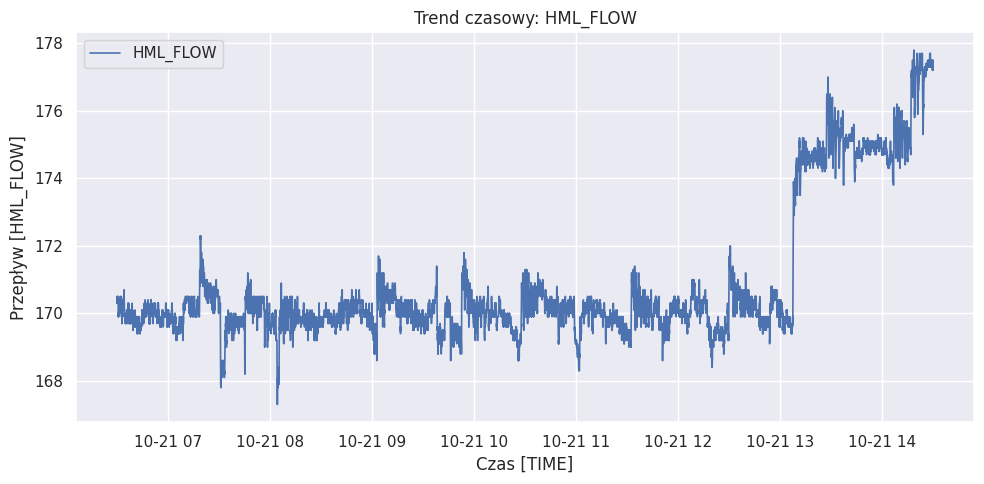

In [ ]:
# Konwersja kolumny TIME na typ datetime
df['TIME'] = pd.to_datetime(df['TIME'], errors='coerce')

# Wykres trendu czasowego
plt.figure(figsize=(10,5))
plt.plot(df['TIME'], df['HML_FLOW'], label='HML_FLOW', linewidth=1.2)

plt.title('Trend czasowy: HML_FLOW')
plt.xlabel('Czas [TIME]')
plt.ylabel('Przepływ [HML_FLOW]')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Działanie na kopii danych -
#FILTR MEDIANOWY

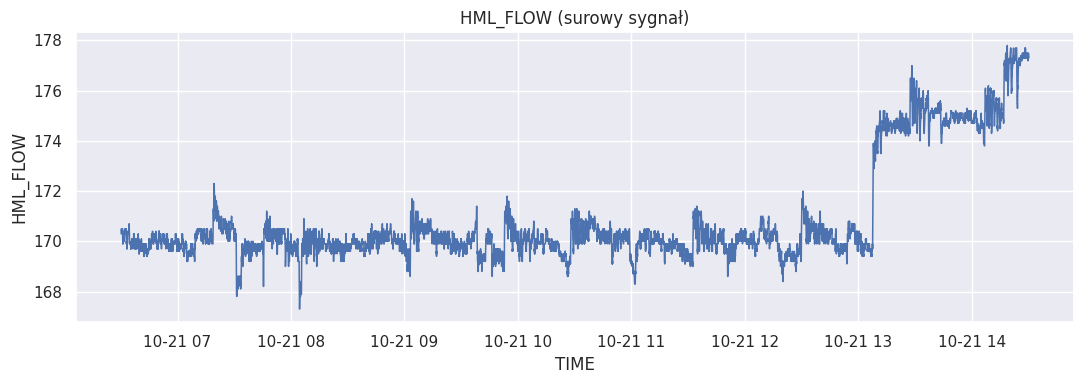

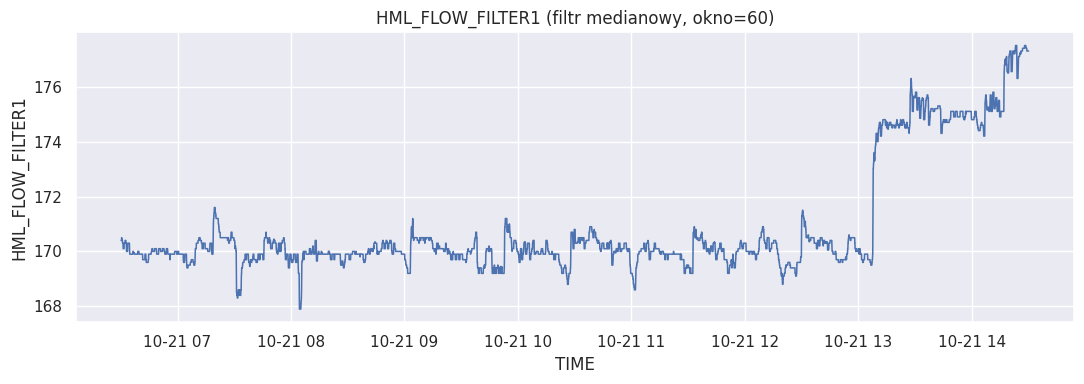

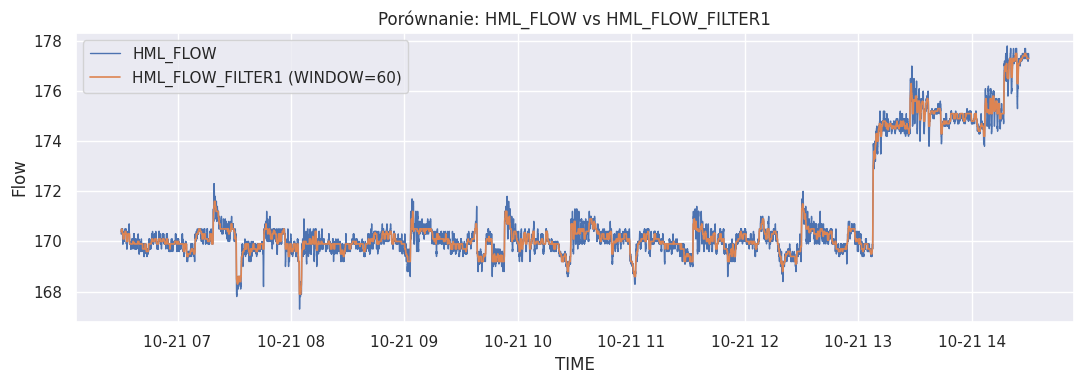

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1) Bezpiecznie przygotuj dane ---
# (upewnij się, że oś czasu jest typu datetime i posortowana)
df['TIME'] = pd.to_datetime(df['TIME'], errors='coerce')
df = df.sort_values('TIME')

# --- 2) Kopia kolumny i filtr medianowy ---
# parametr do wygodnej zmiany: rozmiar okna mediany (liczba próbek, najlepiej nieparzysta)
WINDOW = 60                      # ← zmień np. na 5, 21, 51…
MIN_PERIODS = WINDOW//10 + 1      # ile minimalnie próbek, by wyliczyć medianę (dla brzegów)

# nowa kolumna = kopia surowych danych
df['HML_FLOW_FILTER1'] = df['HML_FLOW'].copy()

# zastosowanie filtru medianowego (rolling median)
df['HML_FLOW_FILTER1'] = (
    df['HML_FLOW_FILTER1']
      .rolling(window=WINDOW, center=True, min_periods=MIN_PERIODS)
      .median()
)

# --- 3) Wykresy ---
# Wykres 1: surowy HML_FLOW
plt.figure(figsize=(11,4))
plt.plot(df['TIME'], df['HML_FLOW'], linewidth=1.1, label='HML_FLOW')
plt.title(f'HML_FLOW (surowy sygnał)')
plt.xlabel('TIME')
plt.ylabel('HML_FLOW')
plt.grid(True)
plt.tight_layout()
plt.show()

# Wykres 2: HML_FLOW_FILTER1 (po medianie)
plt.figure(figsize=(11,4))
plt.plot(df['TIME'], df['HML_FLOW_FILTER1'], linewidth=1.1, label=f'HML_FLOW_FILTER1 (median, WINDOW={WINDOW})')
plt.title(f'HML_FLOW_FILTER1 (filtr medianowy, okno={WINDOW})')
plt.xlabel('TIME')
plt.ylabel('HML_FLOW_FILTER1')
plt.grid(True)
plt.tight_layout()
plt.show()

# Wykres 3: obydwa przebiegi razem
plt.figure(figsize=(11,4))
plt.plot(df['TIME'], df['HML_FLOW'], linewidth=1.0, label='HML_FLOW')
plt.plot(df['TIME'], df['HML_FLOW_FILTER1'], linewidth=1.2, label=f'HML_FLOW_FILTER1 (WINDOW={WINDOW})')
plt.title('Porównanie: HML_FLOW vs HML_FLOW_FILTER1')
plt.xlabel('TIME')
plt.ylabel('Flow')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#Filtr uśredniający

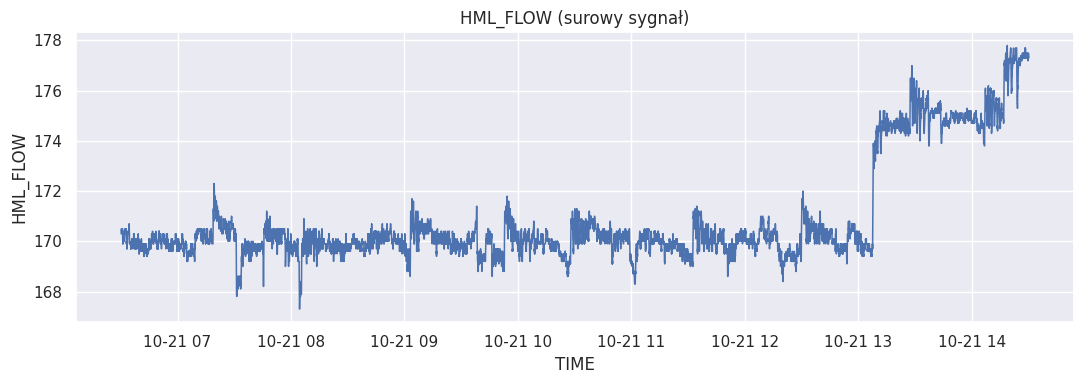

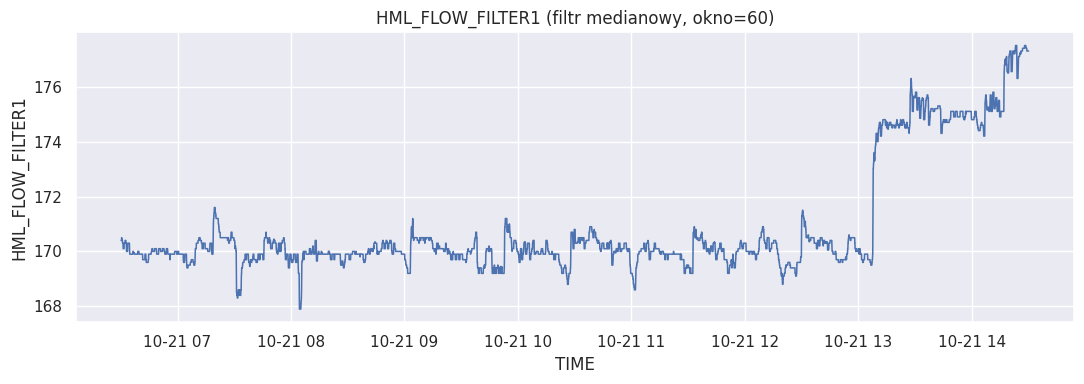

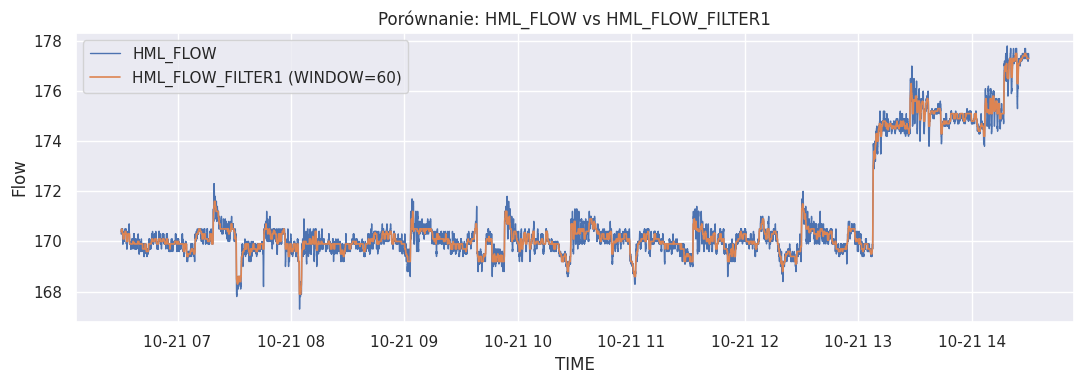

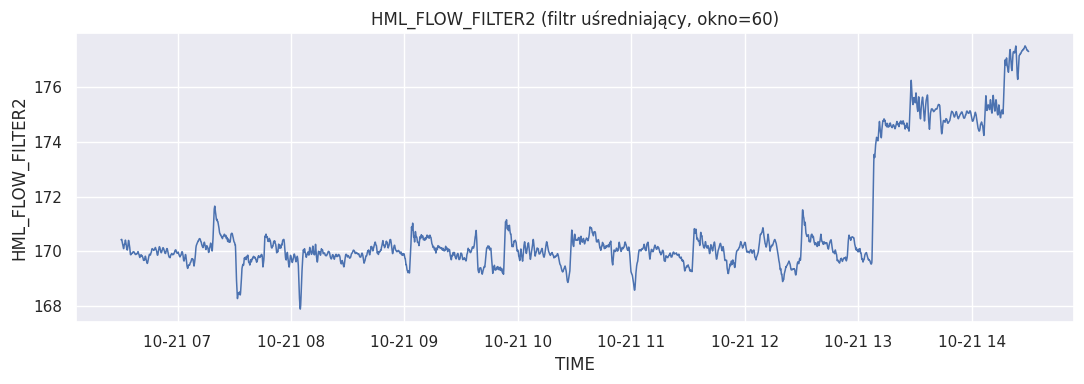

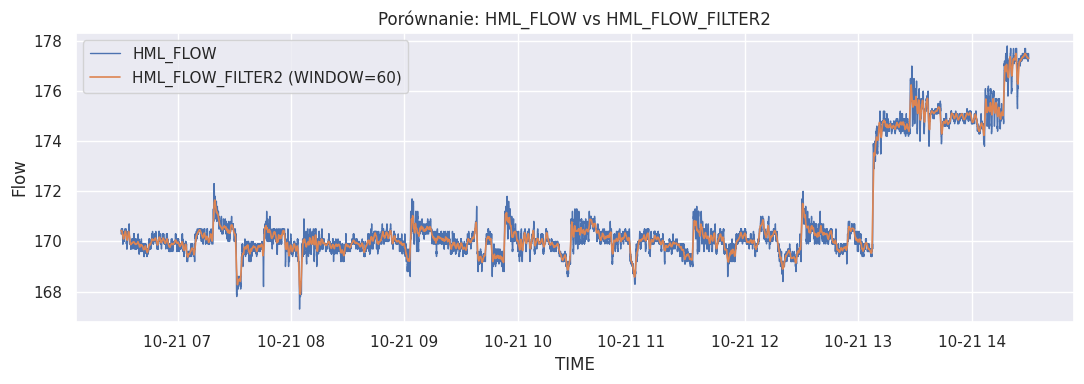

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1) Przygotowanie danych ---
df['TIME'] = pd.to_datetime(df['TIME'], errors='coerce')
df = df.sort_values('TIME')

# --- 2) Filtr medianowy ---
WINDOW = 60
MIN_PERIODS = WINDOW//10 + 1

df['HML_FLOW_FILTER1'] = (
    df['HML_FLOW']
      .rolling(window=WINDOW, center=True, min_periods=MIN_PERIODS)
      .median()
)

# --- 3) Wykresy dla filtru medianowego ---
plt.figure(figsize=(11,4))
plt.plot(df['TIME'], df['HML_FLOW'], linewidth=1.1, label='HML_FLOW')
plt.title('HML_FLOW (surowy sygnał)')
plt.xlabel('TIME')
plt.ylabel('HML_FLOW')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(11,4))
plt.plot(df['TIME'], df['HML_FLOW_FILTER1'], linewidth=1.1, label=f'HML_FLOW_FILTER1 (median, WINDOW={WINDOW})')
plt.title(f'HML_FLOW_FILTER1 (filtr medianowy, okno={WINDOW})')
plt.xlabel('TIME')
plt.ylabel('HML_FLOW_FILTER1')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(11,4))
plt.plot(df['TIME'], df['HML_FLOW'], linewidth=1.0, label='HML_FLOW')
plt.plot(df['TIME'], df['HML_FLOW_FILTER1'], linewidth=1.2, label=f'HML_FLOW_FILTER1 (WINDOW={WINDOW})')
plt.title('Porównanie: HML_FLOW vs HML_FLOW_FILTER1')
plt.xlabel('TIME')
plt.ylabel('Flow')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# --- 4) Filtr uśredniający (moving average) ---
WINDOW2 = 60
MIN_PERIODS2 = WINDOW2//10 + 1

df['HML_FLOW_FILTER2'] = (
    df['HML_FLOW']
      .rolling(window=WINDOW2, center=True, min_periods=MIN_PERIODS2)
      .mean()
)

# --- 5) Wykresy dla filtru uśredniającego ---
plt.figure(figsize=(11,4))
plt.plot(df['TIME'], df['HML_FLOW_FILTER2'], linewidth=1.1, label=f'HML_FLOW_FILTER2 (mean, WINDOW={WINDOW2})')
plt.title(f'HML_FLOW_FILTER2 (filtr uśredniający, okno={WINDOW2})')
plt.xlabel('TIME')
plt.ylabel('HML_FLOW_FILTER2')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(11,4))
plt.plot(df['TIME'], df['HML_FLOW'], linewidth=1.0, label='HML_FLOW')
plt.plot(df['TIME'], df['HML_FLOW_FILTER2'], linewidth=1.2, label=f'HML_FLOW_FILTER2 (WINDOW={WINDOW2})')
plt.title('Porównanie: HML_FLOW vs HML_FLOW_FILTER2')
plt.xlabel('TIME')
plt.ylabel('Flow')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#Regresyjny

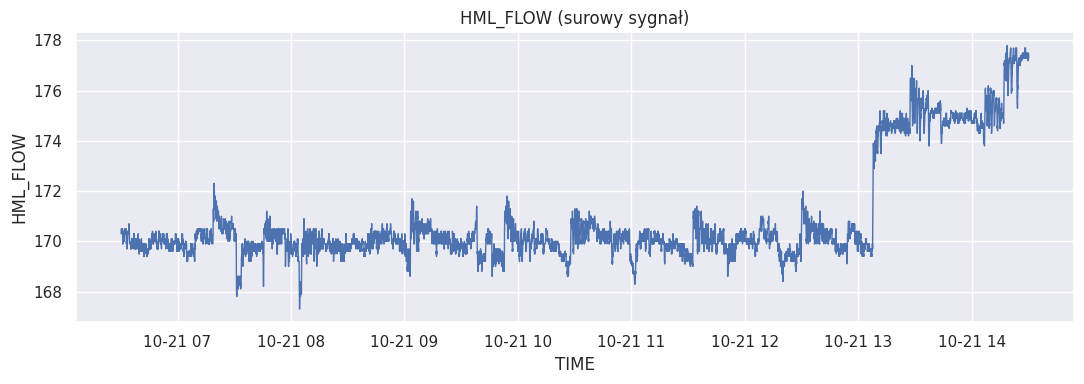

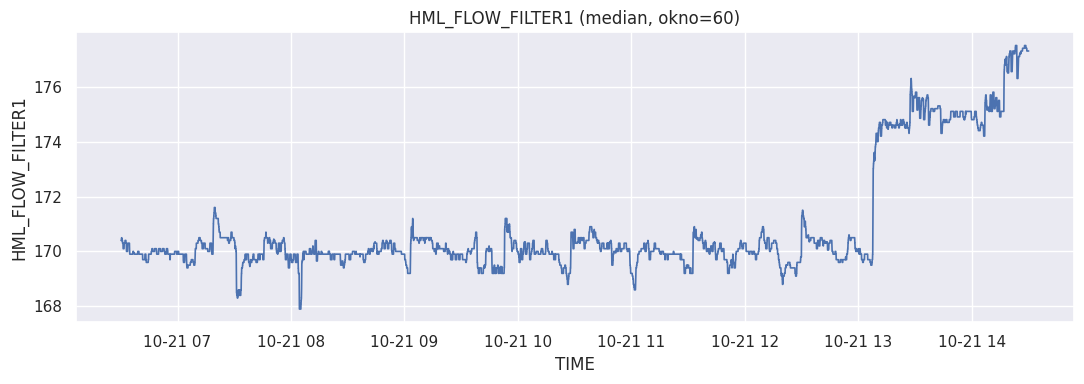

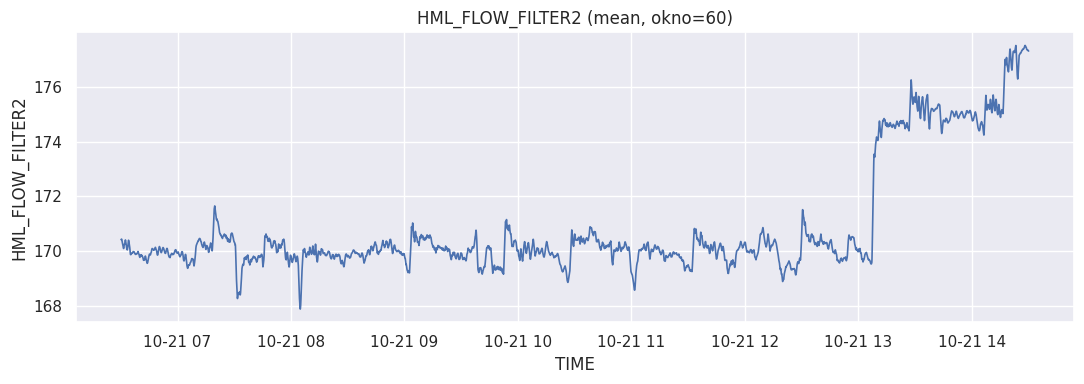

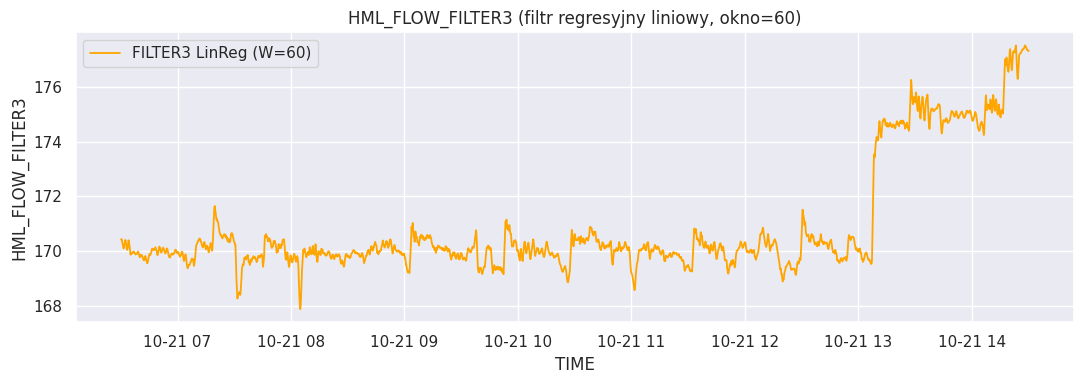

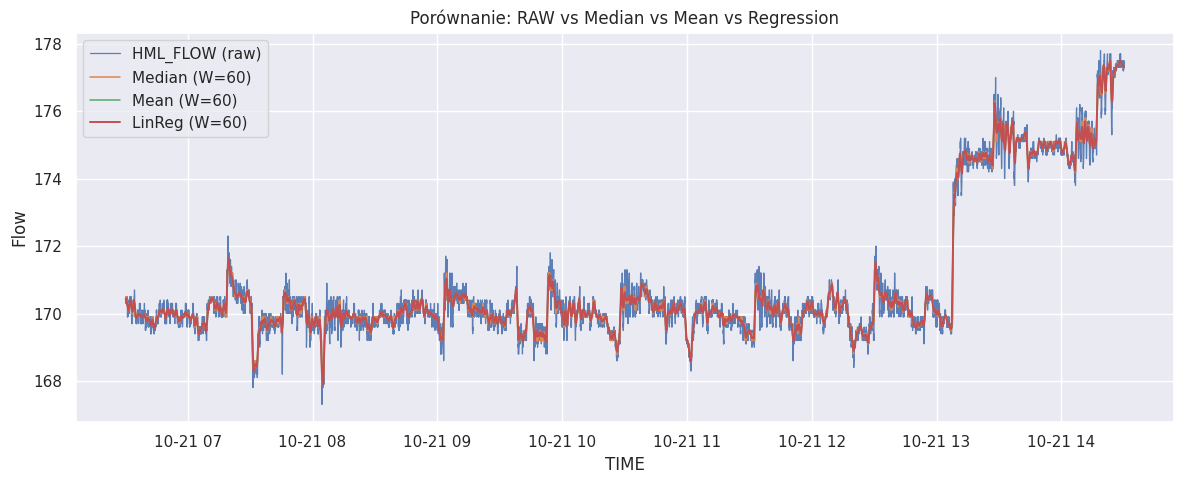

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1) Dane bazowe ---
df['TIME'] = pd.to_datetime(df['TIME'], errors='coerce')
df = df.sort_values('TIME')

# --- 2) Filtr medianowy (FILTER1) ---
WINDOW = 60
MIN_PERIODS = WINDOW//10 + 1

df['HML_FLOW_FILTER1'] = (
    df['HML_FLOW']
      .rolling(window=WINDOW, center=True, min_periods=MIN_PERIODS)
      .median()
)

# --- 3) Filtr uśredniający (FILTER2) ---
WINDOW2 = 60
MIN_PERIODS2 = WINDOW2//10 + 1

df['HML_FLOW_FILTER2'] = (
    df['HML_FLOW']
      .rolling(window=WINDOW2, center=True, min_periods=MIN_PERIODS2)
      .mean()
)

# --- 4) Filtr regresyjny (FILTER3) – Rolling Linear Regression bez pętli i bez sklearn ---
def _linreg_center_value(window_vals):
    # window_vals: ndarray z okna; mogą być NaN-y na brzegach
    valid = ~np.isnan(window_vals)
    if valid.sum() < 2:  # potrzebne min. 2 punkty do regresji
        return np.nan
    y = window_vals[valid].astype(float)
    x_idx = np.nonzero(valid)[0].astype(float)     # indeksy ważnych próbek w obrębie okna
    m, b = np.polyfit(x_idx, y, 1)                 # dopasowanie linii y = m*x + b
    center = (x_idx[0] + x_idx[-1]) / 2.0          # środek obserwowanych (ważnych) indeksów
    return m * center + b

WINDOW3 = 60
MIN_PERIODS3 = WINDOW3//10 + 1

df['HML_FLOW_FILTER3'] = (
    df['HML_FLOW']
      .rolling(window=WINDOW3, center=True, min_periods=MIN_PERIODS3)
      .apply(_linreg_center_value, raw=True)
)

# --- 5) Wykresy jak prosiłeś ---
# 5.1 surowy
plt.figure(figsize=(11,4))
plt.plot(df['TIME'], df['HML_FLOW'], linewidth=1.0, label='HML_FLOW (raw)')
plt.title('HML_FLOW (surowy sygnał)')
plt.xlabel('TIME'); plt.ylabel('HML_FLOW'); plt.grid(True); plt.tight_layout(); plt.show()

# 5.2 medianowy
plt.figure(figsize=(11,4))
plt.plot(df['TIME'], df['HML_FLOW_FILTER1'], linewidth=1.2, label=f'FILTER1 median (W={WINDOW})')
plt.title(f'HML_FLOW_FILTER1 (median, okno={WINDOW})')
plt.xlabel('TIME'); plt.ylabel('HML_FLOW_FILTER1'); plt.grid(True); plt.tight_layout(); plt.show()

# 5.3 uśredniający
plt.figure(figsize=(11,4))
plt.plot(df['TIME'], df['HML_FLOW_FILTER2'], linewidth=1.2, label=f'FILTER2 mean (W={WINDOW2})')
plt.title(f'HML_FLOW_FILTER2 (mean, okno={WINDOW2})')
plt.xlabel('TIME'); plt.ylabel('HML_FLOW_FILTER2'); plt.grid(True); plt.tight_layout(); plt.show()


# 5.4 filtr regresyjny (tylko FILTER3)
plt.figure(figsize=(11,4))
plt.plot(df['TIME'], df['HML_FLOW_FILTER3'], linewidth=1.3, color='orange',
         label=f'FILTER3 LinReg (W={WINDOW3})')
plt.title(f'HML_FLOW_FILTER3 (filtr regresyjny liniowy, okno={WINDOW3})')
plt.xlabel('TIME')
plt.ylabel('HML_FLOW_FILTER3')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 5.5 porównanie: RAW vs Median vs Mean vs Regression (wszystkie)
plt.figure(figsize=(12,5))
plt.plot(df['TIME'], df['HML_FLOW'], linewidth=0.9, label='HML_FLOW (raw)', alpha=0.9)
plt.plot(df['TIME'], df['HML_FLOW_FILTER1'], linewidth=1.1, label=f'Median (W={WINDOW})')
plt.plot(df['TIME'], df['HML_FLOW_FILTER2'], linewidth=1.1, label=f'Mean (W={WINDOW2})')
plt.plot(df['TIME'], df['HML_FLOW_FILTER3'], linewidth=1.4, label=f'LinReg (W={WINDOW3})')
plt.title('Porównanie: RAW vs Median vs Mean vs Regression')
plt.xlabel('TIME'); plt.ylabel('Flow')
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()



#STEAM

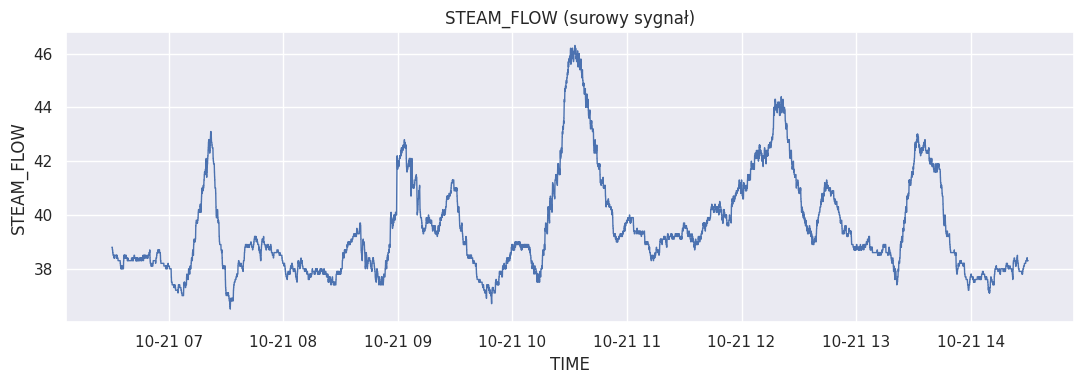

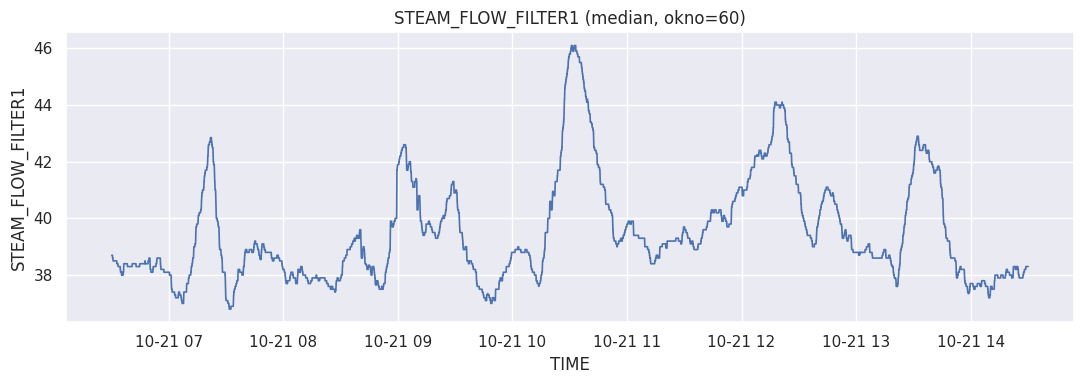

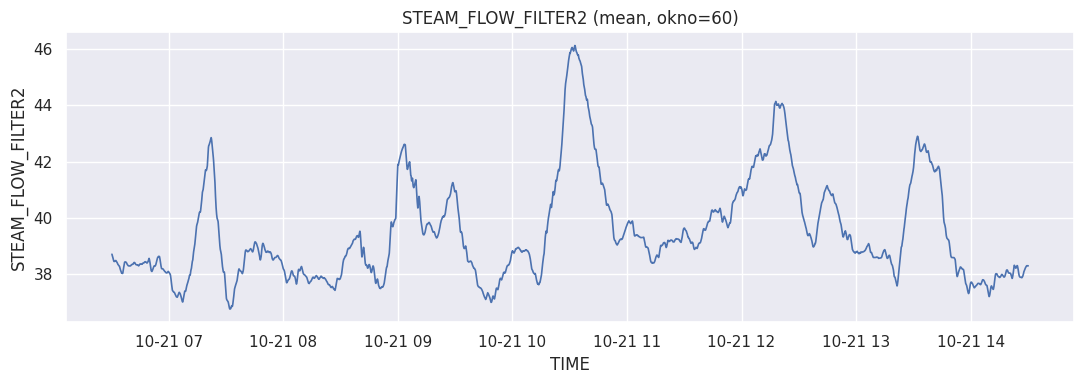

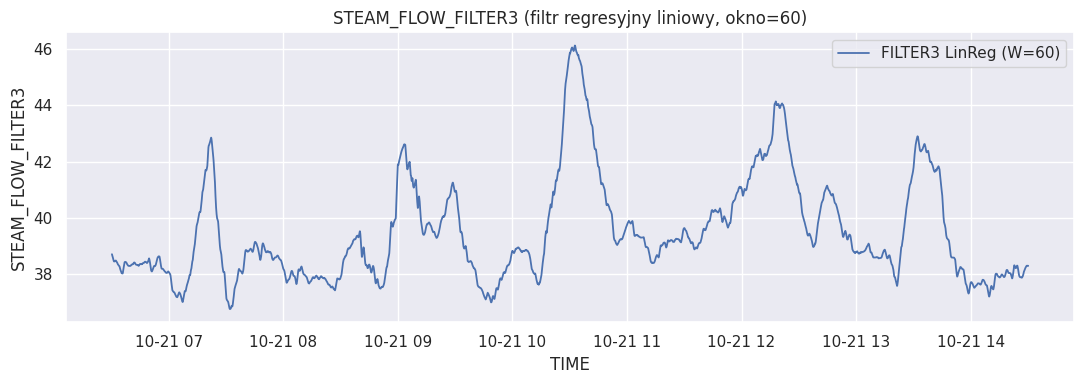

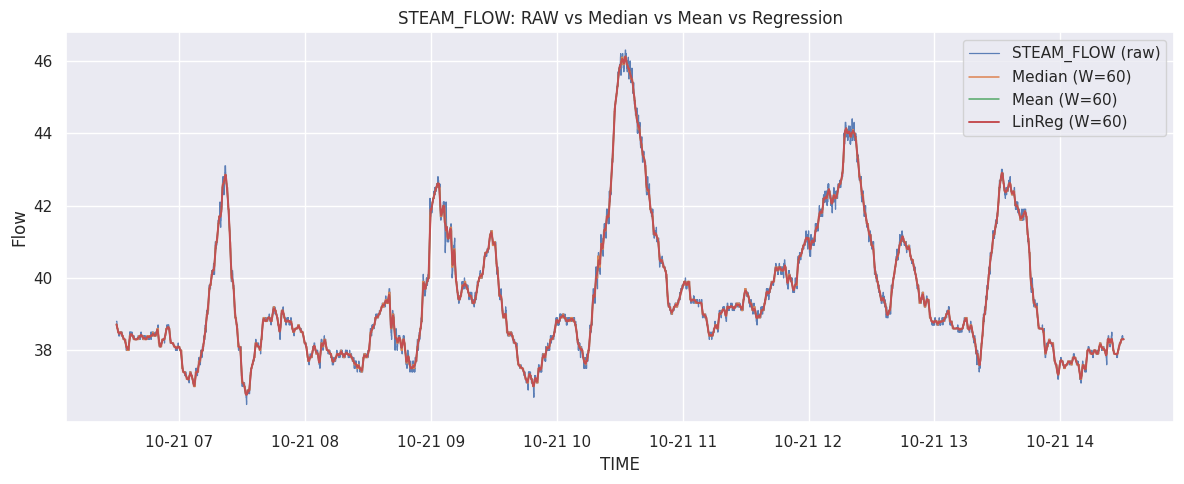

In [ ]:
# --- STEAM_FLOW: filtry 1/2/3 i wykresy ---

# 1) Porządek czasu (gdybyś wykonywał niezależnie)
df['TIME'] = pd.to_datetime(df['TIME'], errors='coerce')
df = df.sort_values('TIME')

# 2) Filtr medianowy (FILTER1)
WINDOW_S = 60
MIN_PERIODS_S = WINDOW_S//10 + 1

df['STEAM_FLOW_FILTER1'] = (
    df['STEAM_FLOW']
      .rolling(window=WINDOW_S, center=True, min_periods=MIN_PERIODS_S)
      .median()
)

# 3) Filtr uśredniający (FILTER2)
WINDOW2_S = 60
MIN_PERIODS2_S = WINDOW2_S//10 + 1

df['STEAM_FLOW_FILTER2'] = (
    df['STEAM_FLOW']
      .rolling(window=WINDOW2_S, center=True, min_periods=MIN_PERIODS2_S)
      .mean()
)

# 4) Filtr regresyjny (FILTER3) – Rolling Linear Regression (używa wcześniej zdefiniowanego _linreg_center_value)
WINDOW3_S = 60
MIN_PERIODS3_S = WINDOW3_S//10 + 1

df['STEAM_FLOW_FILTER3'] = (
    df['STEAM_FLOW']
      .rolling(window=WINDOW3_S, center=True, min_periods=MIN_PERIODS3_S)
      .apply(_linreg_center_value, raw=True)
)

# 5) Wykresy
# 5.1 surowy
plt.figure(figsize=(11,4))
plt.plot(df['TIME'], df['STEAM_FLOW'], linewidth=1.0, label='STEAM_FLOW (raw)')
plt.title('STEAM_FLOW (surowy sygnał)')
plt.xlabel('TIME'); plt.ylabel('STEAM_FLOW')
plt.grid(True); plt.tight_layout(); plt.show()

# 5.2 medianowy
plt.figure(figsize=(11,4))
plt.plot(df['TIME'], df['STEAM_FLOW_FILTER1'], linewidth=1.2, label=f'FILTER1 median (W={WINDOW_S})')
plt.title(f'STEAM_FLOW_FILTER1 (median, okno={WINDOW_S})')
plt.xlabel('TIME'); plt.ylabel('STEAM_FLOW_FILTER1')
plt.grid(True); plt.tight_layout(); plt.show()

# 5.3 uśredniający
plt.figure(figsize=(11,4))
plt.plot(df['TIME'], df['STEAM_FLOW_FILTER2'], linewidth=1.2, label=f'FILTER2 mean (W={WINDOW2_S})')
plt.title(f'STEAM_FLOW_FILTER2 (mean, okno={WINDOW2_S})')
plt.xlabel('TIME'); plt.ylabel('STEAM_FLOW_FILTER2')
plt.grid(True); plt.tight_layout(); plt.show()

# 5.4 regresyjny (tylko FILTER3)
plt.figure(figsize=(11,4))
plt.plot(df['TIME'], df['STEAM_FLOW_FILTER3'], linewidth=1.3, label=f'FILTER3 LinReg (W={WINDOW3_S})')
plt.title(f'STEAM_FLOW_FILTER3 (filtr regresyjny liniowy, okno={WINDOW3_S})')
plt.xlabel('TIME'); plt.ylabel('STEAM_FLOW_FILTER3')
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

# 5.5 porównanie: RAW vs Median vs Mean vs Regression (wszystkie)
plt.figure(figsize=(12,5))
plt.plot(df['TIME'], df['STEAM_FLOW'], linewidth=0.9, label='STEAM_FLOW (raw)', alpha=0.9)
plt.plot(df['TIME'], df['STEAM_FLOW_FILTER1'], linewidth=1.1, label=f'Median (W={WINDOW_S})')
plt.plot(df['TIME'], df['STEAM_FLOW_FILTER2'], linewidth=1.1, label=f'Mean (W={WINDOW2_S})')
plt.plot(df['TIME'], df['STEAM_FLOW_FILTER3'], linewidth=1.4, label=f'LinReg (W={WINDOW3_S})')
plt.title('STEAM_FLOW: RAW vs Median vs Mean vs Regression')
plt.xlabel('TIME'); plt.ylabel('Flow')
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()


#pH


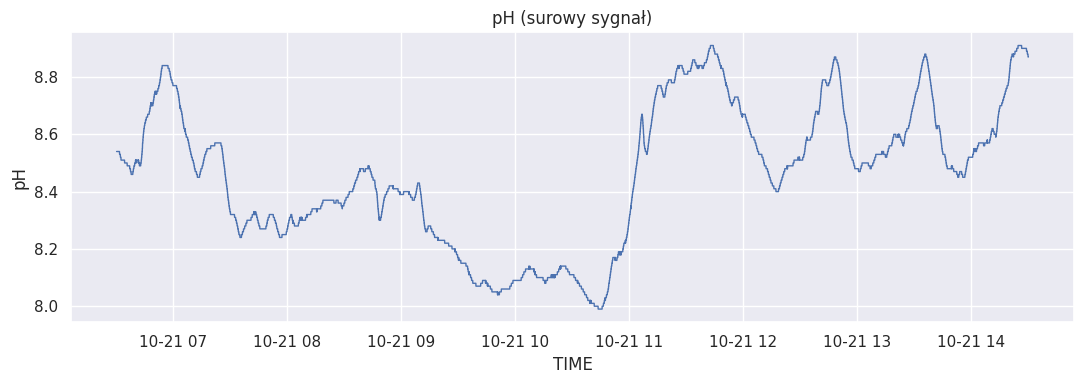

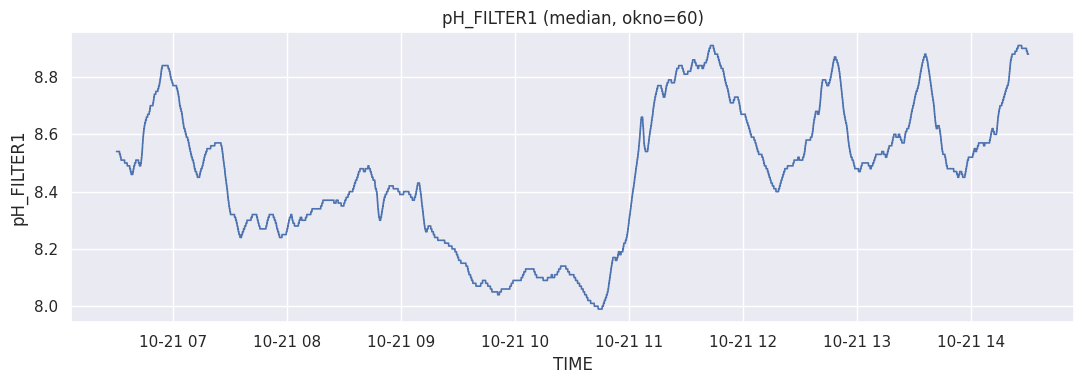

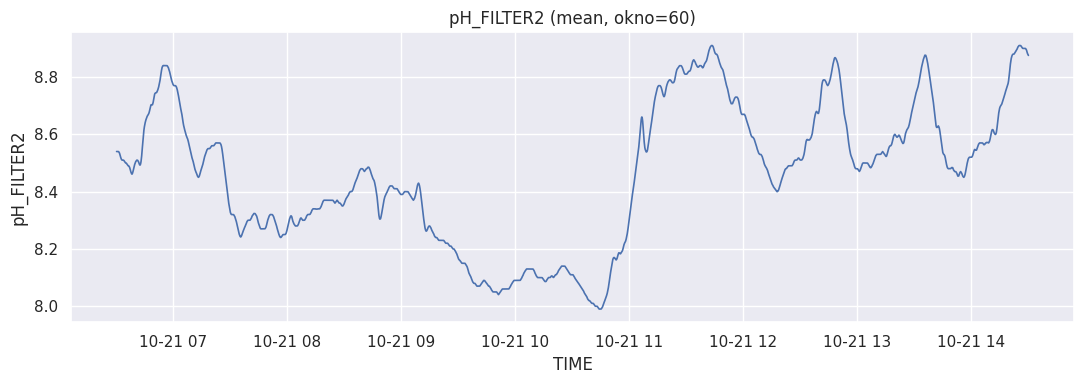

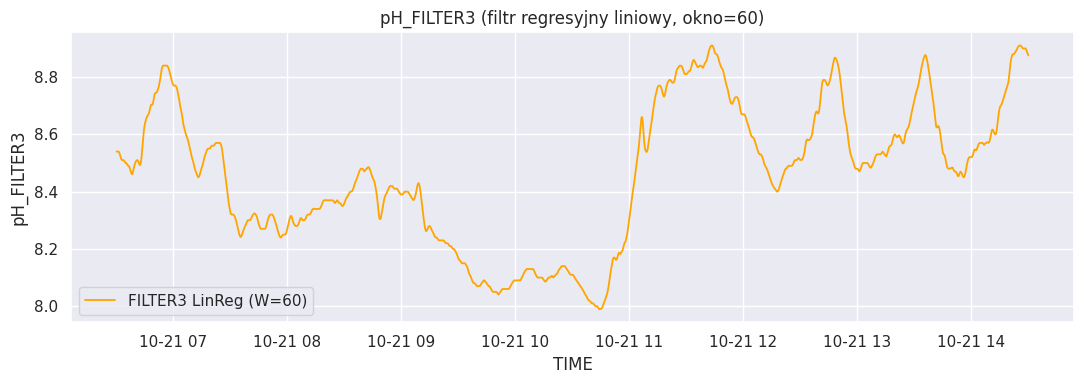

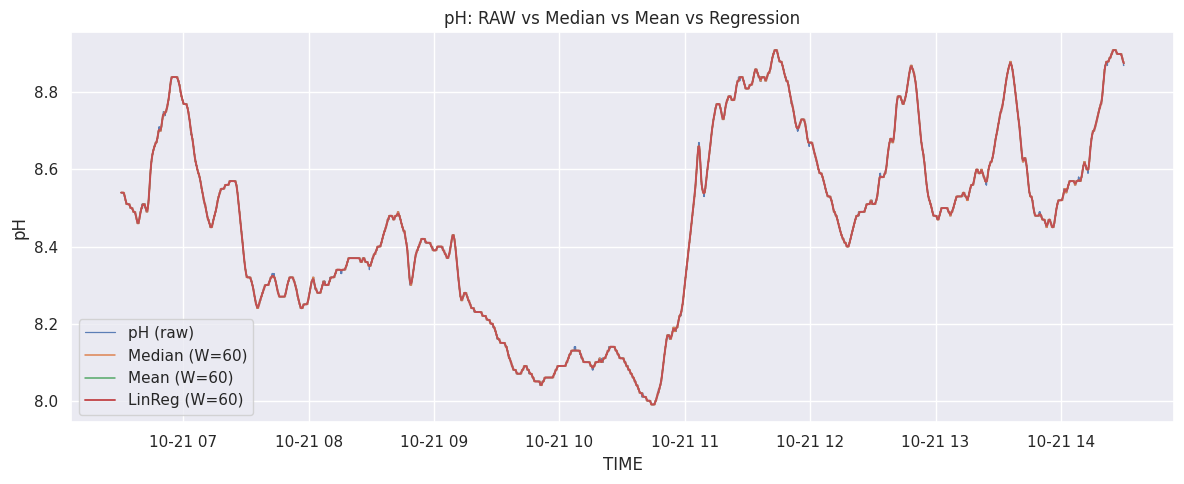

In [ ]:
# --- pH: filtry 1/2/3 i wykresy ---

# 1) Porządek czasu
df['TIME'] = pd.to_datetime(df['TIME'], errors='coerce')
df = df.sort_values('TIME')

# 2) Filtr medianowy (FILTER1)
WINDOW_PH = 60
MIN_PERIODS_PH = WINDOW_PH//10 + 1

df['pH_FILTER1'] = (
    df['pH']
      .rolling(window=WINDOW_PH, center=True, min_periods=MIN_PERIODS_PH)
      .median()
)

# 3) Filtr uśredniający (FILTER2)
WINDOW2_PH = 60
MIN_PERIODS2_PH = WINDOW2_PH//10 + 1

df['pH_FILTER2'] = (
    df['pH']
      .rolling(window=WINDOW2_PH, center=True, min_periods=MIN_PERIODS2_PH)
      .mean()
)

# 4) Filtr regresyjny (FILTER3) – Rolling Linear Regression
WINDOW3_PH = 60
MIN_PERIODS3_PH = WINDOW3_PH//10 + 1

df['pH_FILTER3'] = (
    df['pH']
      .rolling(window=WINDOW3_PH, center=True, min_periods=MIN_PERIODS3_PH)
      .apply(_linreg_center_value, raw=True)
)

# 5) Wykresy
# 5.1 surowy
plt.figure(figsize=(11,4))
plt.plot(df['TIME'], df['pH'], linewidth=1.0, label='pH (raw)')
plt.title('pH (surowy sygnał)')
plt.xlabel('TIME'); plt.ylabel('pH')
plt.grid(True); plt.tight_layout(); plt.show()

# 5.2 medianowy
plt.figure(figsize=(11,4))
plt.plot(df['TIME'], df['pH_FILTER1'], linewidth=1.2, label=f'FILTER1 median (W={WINDOW_PH})')
plt.title(f'pH_FILTER1 (median, okno={WINDOW_PH})')
plt.xlabel('TIME'); plt.ylabel('pH_FILTER1')
plt.grid(True); plt.tight_layout(); plt.show()

# 5.3 uśredniający
plt.figure(figsize=(11,4))
plt.plot(df['TIME'], df['pH_FILTER2'], linewidth=1.2, label=f'FILTER2 mean (W={WINDOW2_PH})')
plt.title(f'pH_FILTER2 (mean, okno={WINDOW2_PH})')
plt.xlabel('TIME'); plt.ylabel('pH_FILTER2')
plt.grid(True); plt.tight_layout(); plt.show()

# 5.4 regresyjny
plt.figure(figsize=(11,4))
plt.plot(df['TIME'], df['pH_FILTER3'], linewidth=1.3, color='orange',
         label=f'FILTER3 LinReg (W={WINDOW3_PH})')
plt.title(f'pH_FILTER3 (filtr regresyjny liniowy, okno={WINDOW3_PH})')
plt.xlabel('TIME'); plt.ylabel('pH_FILTER3')
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

# 5.5 porównanie wszystkich
plt.figure(figsize=(12,5))
plt.plot(df['TIME'], df['pH'], linewidth=0.9, label='pH (raw)', alpha=0.9)
plt.plot(df['TIME'], df['pH_FILTER1'], linewidth=1.1, label=f'Median (W={WINDOW_PH})')
plt.plot(df['TIME'], df['pH_FILTER2'], linewidth=1.1, label=f'Mean (W={WINDOW2_PH})')
plt.plot(df['TIME'], df['pH_FILTER3'], linewidth=1.4, label=f'LinReg (W={WINDOW3_PH})')
plt.title('pH: RAW vs Median vs Mean vs Regression')
plt.xlabel('TIME'); plt.ylabel('pH')
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()


#Calc Milk Flow

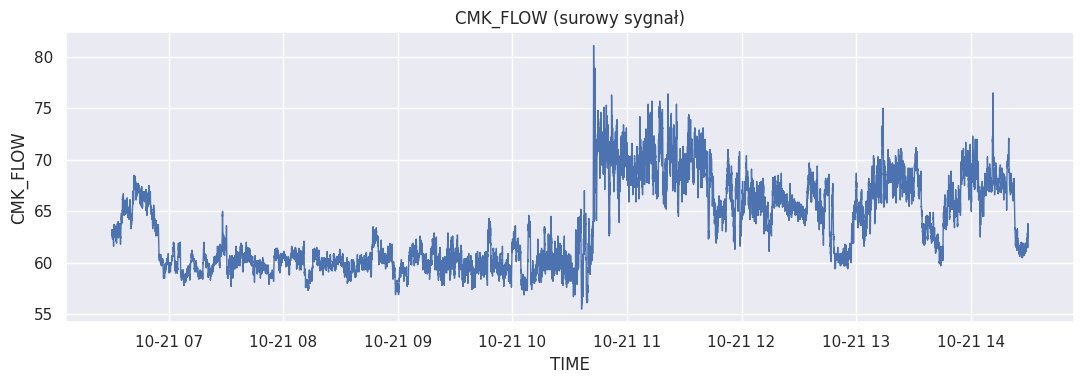

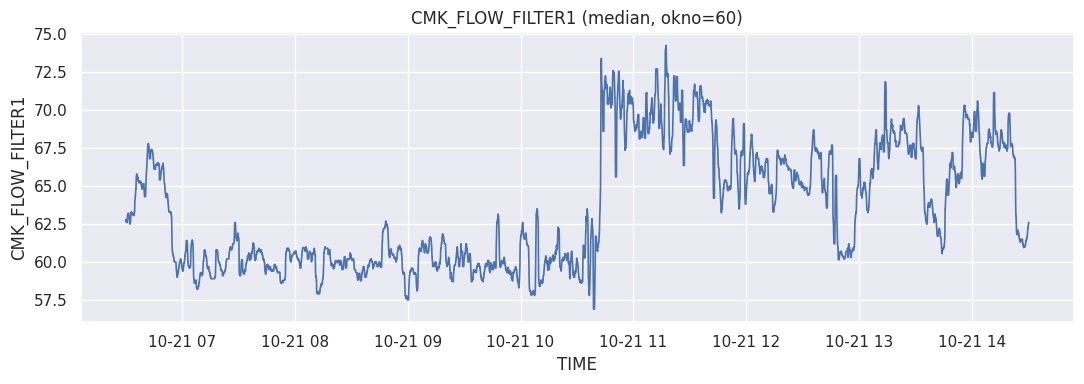

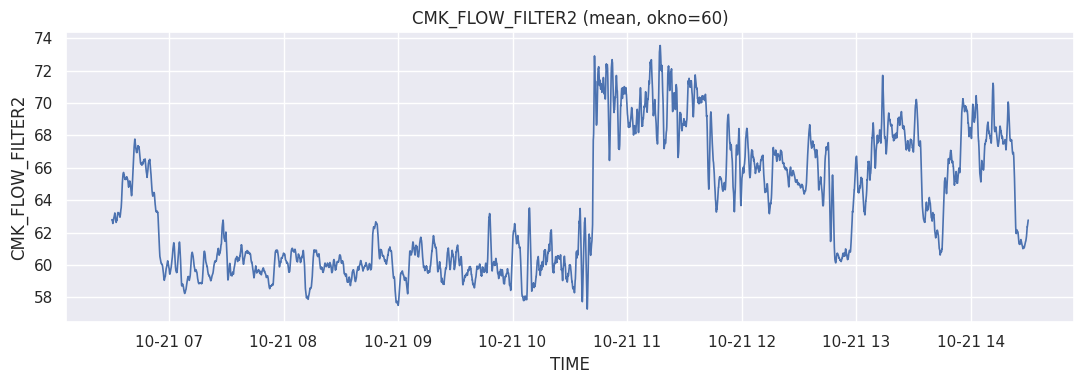

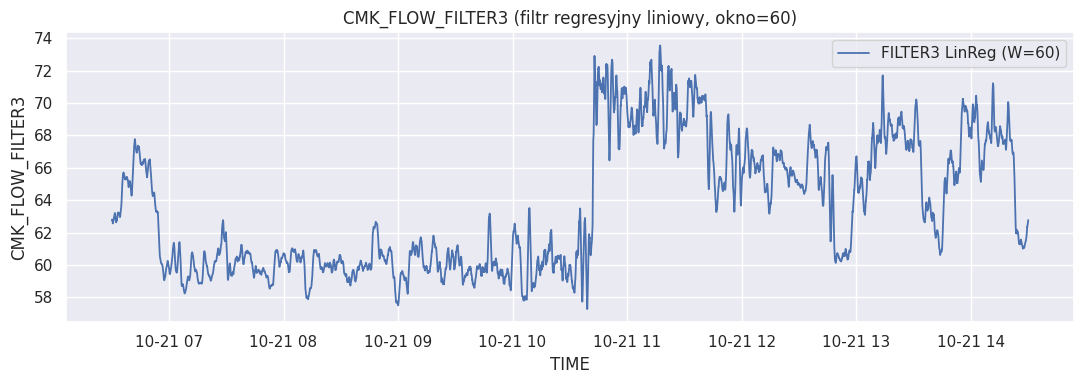

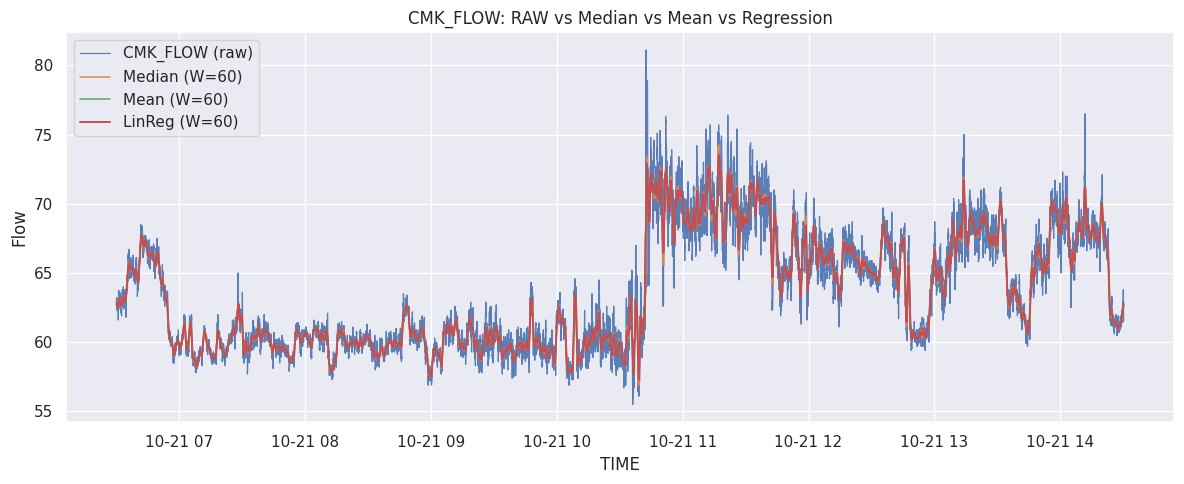

In [ ]:
# --- CMK_FLOW: filtry 1/2/3 i wykresy ---
# (zakładam, że _linreg_center_value jest już zdefiniowane jak wcześniej)

# 1) Porządek czasu (gdybyś uruchamiał niezależnie)
df['TIME'] = pd.to_datetime(df['TIME'], errors='coerce')
df = df.sort_values('TIME')

# 2) Filtr medianowy (FILTER1)
WINDOW_CMK = 60
MIN_PERIODS_CMK = WINDOW_CMK//10 + 1

df['CMK_FLOW_FILTER1'] = (
    df['CMK_FLOW']
      .rolling(window=WINDOW_CMK, center=True, min_periods=MIN_PERIODS_CMK)
      .median()
)

# 3) Filtr uśredniający (FILTER2)
WINDOW2_CMK = 60
MIN_PERIODS2_CMK = WINDOW2_CMK//10 + 1

df['CMK_FLOW_FILTER2'] = (
    df['CMK_FLOW']
      .rolling(window=WINDOW2_CMK, center=True, min_periods=MIN_PERIODS2_CMK)
      .mean()
)

# 4) Filtr regresyjny (FILTER3) – Rolling Linear Regression
WINDOW3_CMK = 60
MIN_PERIODS3_CMK = WINDOW3_CMK//10 + 1

df['CMK_FLOW_FILTER3'] = (
    df['CMK_FLOW']
      .rolling(window=WINDOW3_CMK, center=True, min_periods=MIN_PERIODS3_CMK)
      .apply(_linreg_center_value, raw=True)
)

# 5) Wykresy
# 5.1 surowy
plt.figure(figsize=(11,4))
plt.plot(df['TIME'], df['CMK_FLOW'], linewidth=1.0, label='CMK_FLOW (raw)')
plt.title('CMK_FLOW (surowy sygnał)')
plt.xlabel('TIME'); plt.ylabel('CMK_FLOW')
plt.grid(True); plt.tight_layout(); plt.show()

# 5.2 medianowy
plt.figure(figsize=(11,4))
plt.plot(df['TIME'], df['CMK_FLOW_FILTER1'], linewidth=1.2, label=f'FILTER1 median (W={WINDOW_CMK})')
plt.title(f'CMK_FLOW_FILTER1 (median, okno={WINDOW_CMK})')
plt.xlabel('TIME'); plt.ylabel('CMK_FLOW_FILTER1')
plt.grid(True); plt.tight_layout(); plt.show()

# 5.3 uśredniający
plt.figure(figsize=(11,4))
plt.plot(df['TIME'], df['CMK_FLOW_FILTER2'], linewidth=1.2, label=f'FILTER2 mean (W={WINDOW2_CMK})')
plt.title(f'CMK_FLOW_FILTER2 (mean, okno={WINDOW2_CMK})')
plt.xlabel('TIME'); plt.ylabel('CMK_FLOW_FILTER2')
plt.grid(True); plt.tight_layout(); plt.show()

# 5.4 regresyjny (tylko FILTER3)
plt.figure(figsize=(11,4))
plt.plot(df['TIME'], df['CMK_FLOW_FILTER3'], linewidth=1.3, label=f'FILTER3 LinReg (W={WINDOW3_CMK})')
plt.title(f'CMK_FLOW_FILTER3 (filtr regresyjny liniowy, okno={WINDOW3_CMK})')
plt.xlabel('TIME'); plt.ylabel('CMK_FLOW_FILTER3')
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

# 5.5 porównanie: RAW vs Median vs Mean vs Regression (wszystkie)
plt.figure(figsize=(12,5))
plt.plot(df['TIME'], df['CMK_FLOW'], linewidth=0.9, label='CMK_FLOW (raw)', alpha=0.9)
plt.plot(df['TIME'], df['CMK_FLOW_FILTER1'], linewidth=1.1, label=f'Median (W={WINDOW_CMK})')
plt.plot(df['TIME'], df['CMK_FLOW_FILTER2'], linewidth=1.1, label=f'Mean (W={WINDOW2_CMK})')
plt.plot(df['TIME'], df['CMK_FLOW_FILTER3'], linewidth=1.4, label=f'LinReg (W={WINDOW3_CMK})')
plt.title('CMK_FLOW: RAW vs Median vs Mean vs Regression')
plt.xlabel('TIME'); plt.ylabel('Flow')
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()


#Density

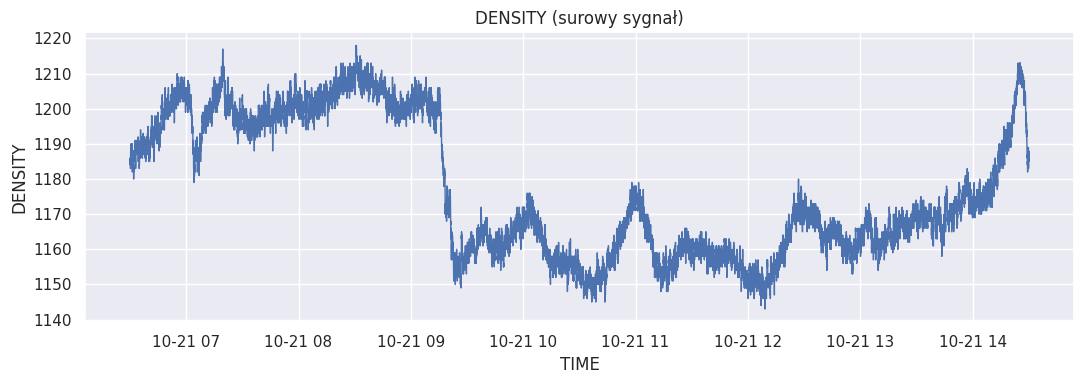

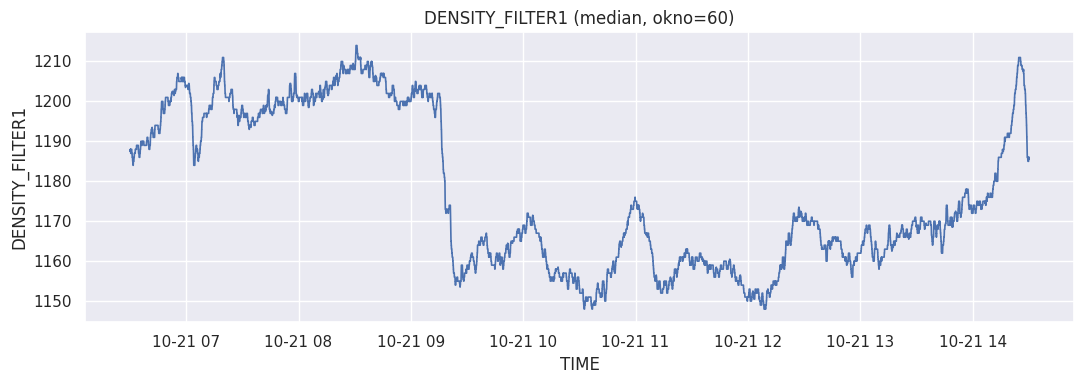

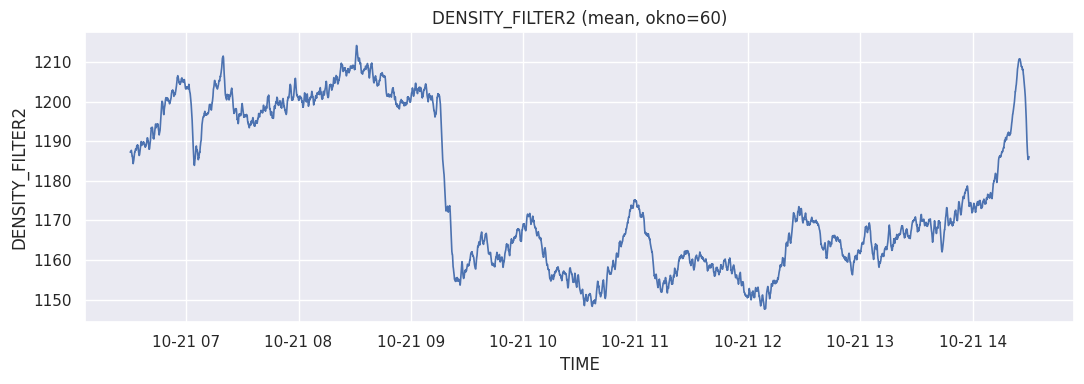

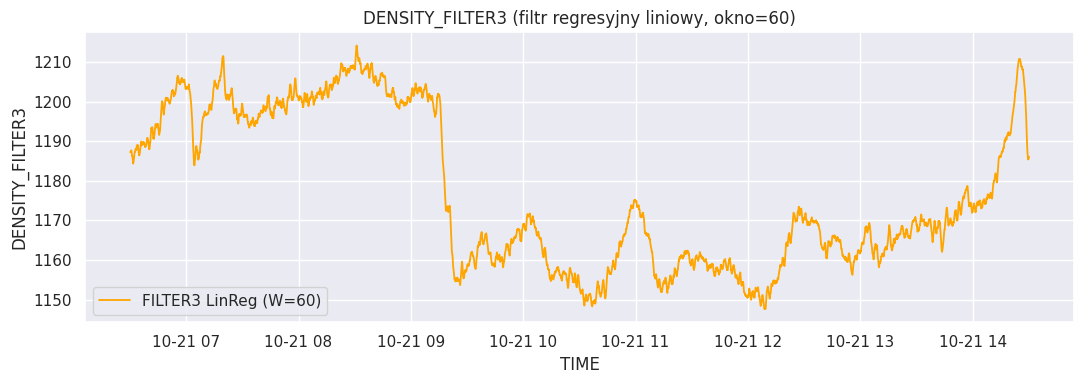

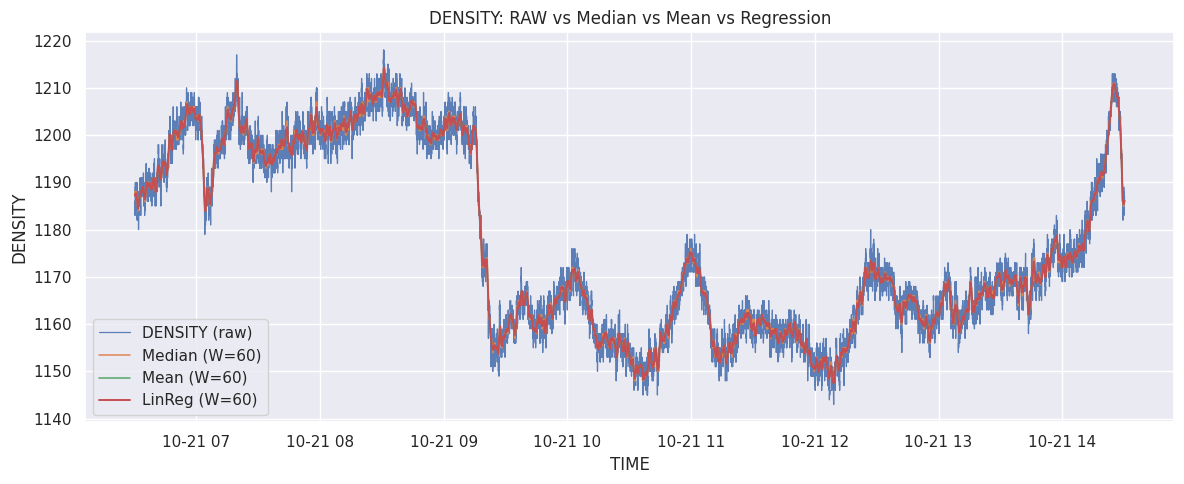

In [ ]:
# --- DENSITY: filtry 1/2/3 i wykresy ---
# (zakładam, że funkcja _linreg_center_value już istnieje)

# 1) Porządek czasu
df['TIME'] = pd.to_datetime(df['TIME'], errors='coerce')
df = df.sort_values('TIME')

# 2) Filtr medianowy (FILTER1)
WINDOW_DEN = 60
MIN_PERIODS_DEN = WINDOW_DEN//10 + 1

df['DENSITY_FILTER1'] = (
    df['DENSITY']
      .rolling(window=WINDOW_DEN, center=True, min_periods=MIN_PERIODS_DEN)
      .median()
)

# 3) Filtr uśredniający (FILTER2)
WINDOW2_DEN = 60
MIN_PERIODS2_DEN = WINDOW2_DEN//10 + 1

df['DENSITY_FILTER2'] = (
    df['DENSITY']
      .rolling(window=WINDOW2_DEN, center=True, min_periods=MIN_PERIODS2_DEN)
      .mean()
)

# 4) Filtr regresyjny (FILTER3) – Rolling Linear Regression
WINDOW3_DEN = 60
MIN_PERIODS3_DEN = WINDOW3_DEN//10 + 1

df['DENSITY_FILTER3'] = (
    df['DENSITY']
      .rolling(window=WINDOW3_DEN, center=True, min_periods=MIN_PERIODS3_DEN)
      .apply(_linreg_center_value, raw=True)
)

# 5) Wykresy
# 5.1 surowy
plt.figure(figsize=(11,4))
plt.plot(df['TIME'], df['DENSITY'], linewidth=1.0, label='DENSITY (raw)')
plt.title('DENSITY (surowy sygnał)')
plt.xlabel('TIME'); plt.ylabel('DENSITY')
plt.grid(True); plt.tight_layout(); plt.show()

# 5.2 medianowy
plt.figure(figsize=(11,4))
plt.plot(df['TIME'], df['DENSITY_FILTER1'], linewidth=1.2, label=f'FILTER1 median (W={WINDOW_DEN})')
plt.title(f'DENSITY_FILTER1 (median, okno={WINDOW_DEN})')
plt.xlabel('TIME'); plt.ylabel('DENSITY_FILTER1')
plt.grid(True); plt.tight_layout(); plt.show()

# 5.3 uśredniający
plt.figure(figsize=(11,4))
plt.plot(df['TIME'], df['DENSITY_FILTER2'], linewidth=1.2, label=f'FILTER2 mean (W={WINDOW2_DEN})')
plt.title(f'DENSITY_FILTER2 (mean, okno={WINDOW2_DEN})')
plt.xlabel('TIME'); plt.ylabel('DENSITY_FILTER2')
plt.grid(True); plt.tight_layout(); plt.show()

# 5.4 regresyjny (tylko FILTER3)
plt.figure(figsize=(11,4))
plt.plot(df['TIME'], df['DENSITY_FILTER3'], linewidth=1.3, color='orange',
         label=f'FILTER3 LinReg (W={WINDOW3_DEN})')
plt.title(f'DENSITY_FILTER3 (filtr regresyjny liniowy, okno={WINDOW3_DEN})')
plt.xlabel('TIME'); plt.ylabel('DENSITY_FILTER3')
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

# 5.5 porównanie: RAW vs Median vs Mean vs Regression (wszystkie)
plt.figure(figsize=(12,5))
plt.plot(df['TIME'], df['DENSITY'], linewidth=0.9, label='DENSITY (raw)', alpha=0.9)
plt.plot(df['TIME'], df['DENSITY_FILTER1'], linewidth=1.1, label=f'Median (W={WINDOW_DEN})')
plt.plot(df['TIME'], df['DENSITY_FILTER2'], linewidth=1.1, label=f'Mean (W={WINDOW2_DEN})')
plt.plot(df['TIME'], df['DENSITY_FILTER3'], linewidth=1.4, label=f'LinReg (W={WINDOW3_DEN})')
plt.title('DENSITY: RAW vs Median vs Mean vs Regression')
plt.xlabel('TIME'); plt.ylabel('DENSITY')
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()


porównawcze

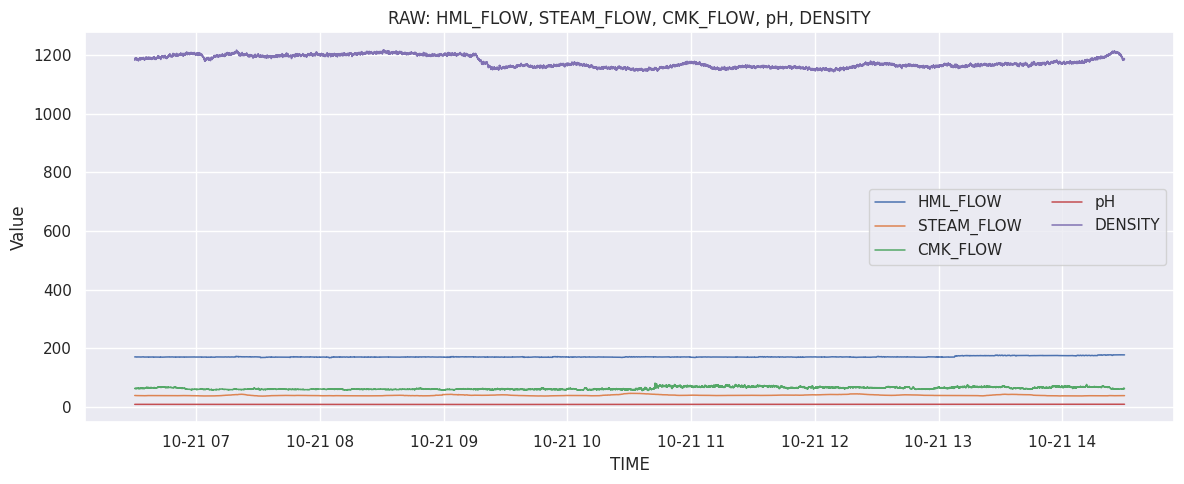

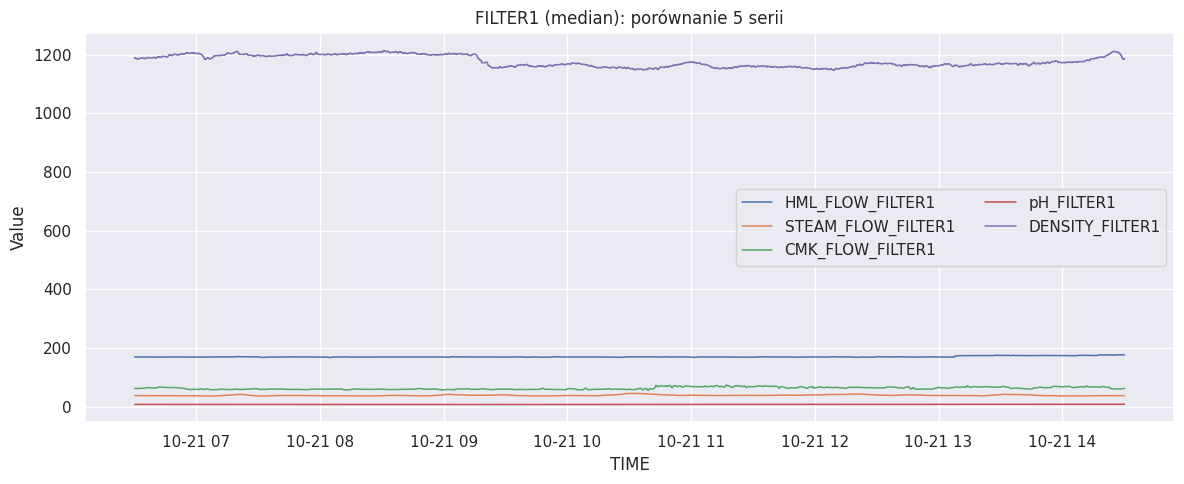

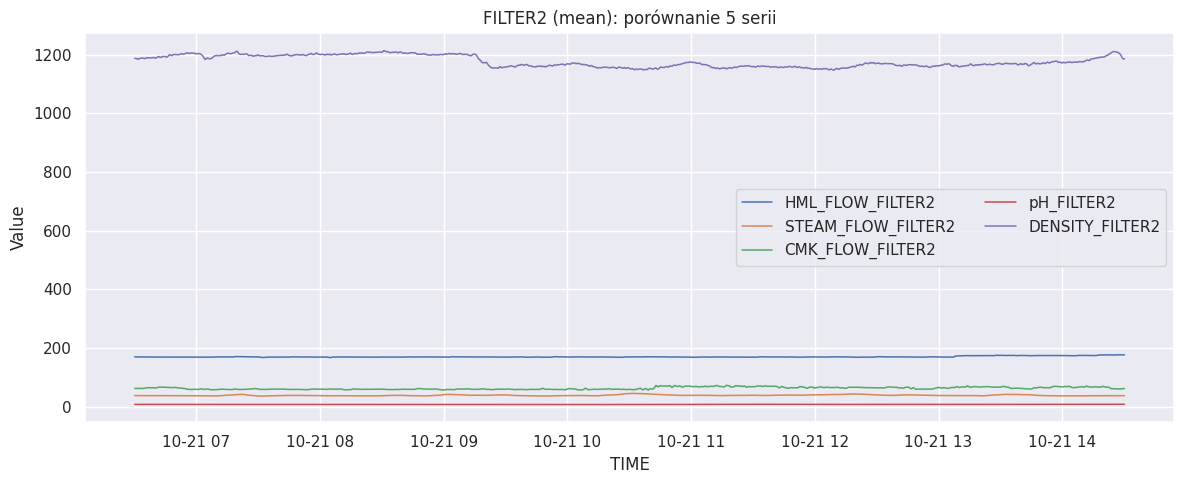

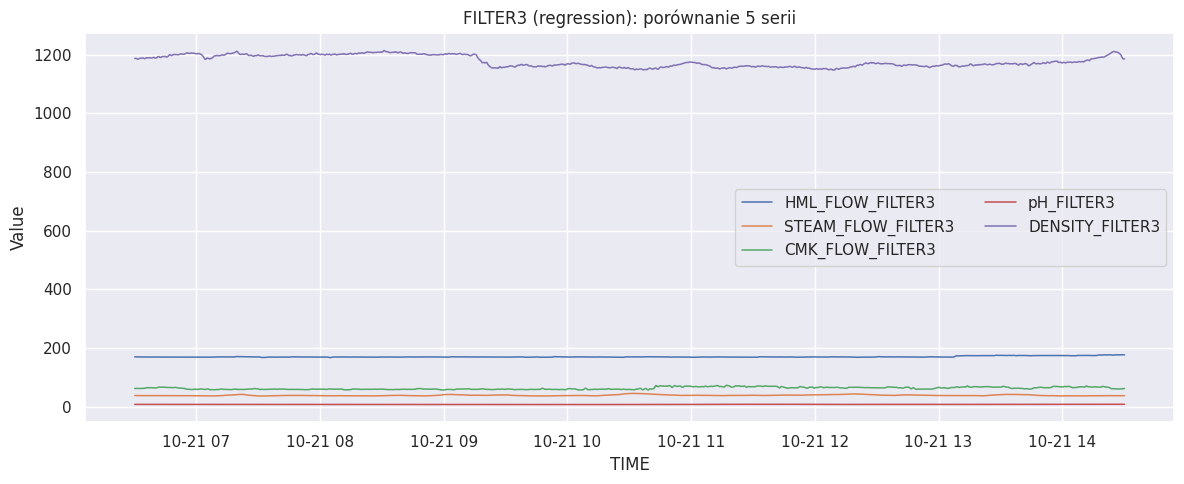

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 0) Porządek czasu (jeśli nie zrobione wcześniej)
df['TIME'] = pd.to_datetime(df['TIME'], errors='coerce')
df = df.sort_values('TIME')

def plot_multi(df, xcol, ycols, title, ylabel):
    plt.figure(figsize=(12,5))
    for col in ycols:
        if col in df.columns:
            plt.plot(df[xcol], df[col], linewidth=1.1, label=col)
    plt.title(title)
    plt.xlabel(xcol)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend(ncol=2)
    plt.tight_layout()
    plt.show()

# 1) Surowe
raw_cols = ['HML_FLOW', 'STEAM_FLOW', 'CMK_FLOW', 'pH', 'DENSITY']
plot_multi(df, 'TIME', raw_cols, 'RAW: HML_FLOW, STEAM_FLOW, CMK_FLOW, pH, DENSITY', 'Value')

# 2) FILTER1 (median)
f1_cols = ['HML_FLOW_FILTER1', 'STEAM_FLOW_FILTER1', 'CMK_FLOW_FILTER1', 'pH_FILTER1', 'DENSITY_FILTER1']
plot_multi(df, 'TIME', f1_cols, 'FILTER1 (median): porównanie 5 serii', 'Value')

# 3) FILTER2 (mean)
f2_cols = ['HML_FLOW_FILTER2', 'STEAM_FLOW_FILTER2', 'CMK_FLOW_FILTER2', 'pH_FILTER2', 'DENSITY_FILTER2']
plot_multi(df, 'TIME', f2_cols, 'FILTER2 (mean): porównanie 5 serii', 'Value')

# 4) FILTER3 (rolling linear regression)
f3_cols = ['HML_FLOW_FILTER3', 'STEAM_FLOW_FILTER3', 'CMK_FLOW_FILTER3', 'pH_FILTER3', 'DENSITY_FILTER3']
plot_multi(df, 'TIME', f3_cols, 'FILTER3 (regression): porównanie 5 serii', 'Value')


znormalizowane

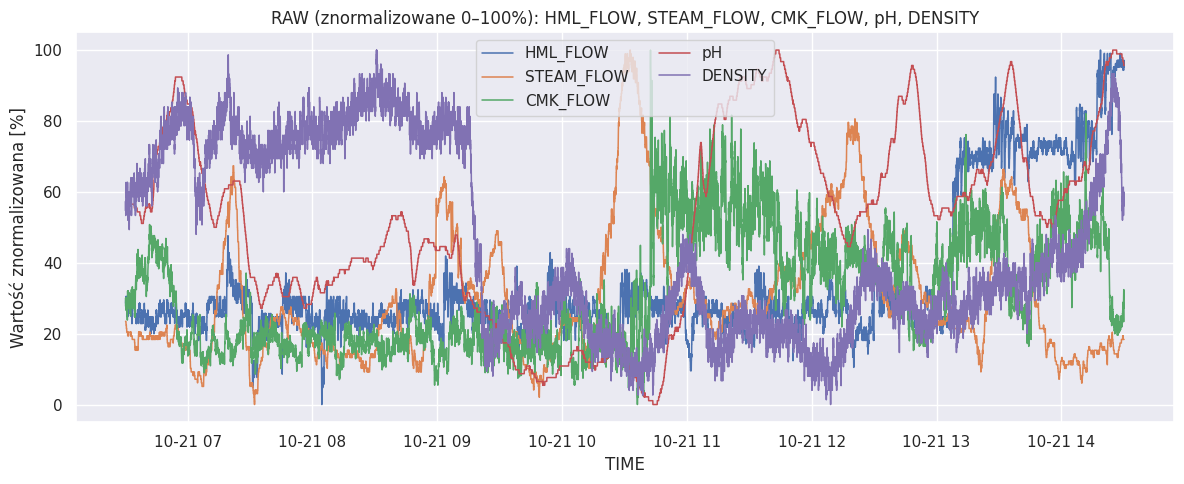

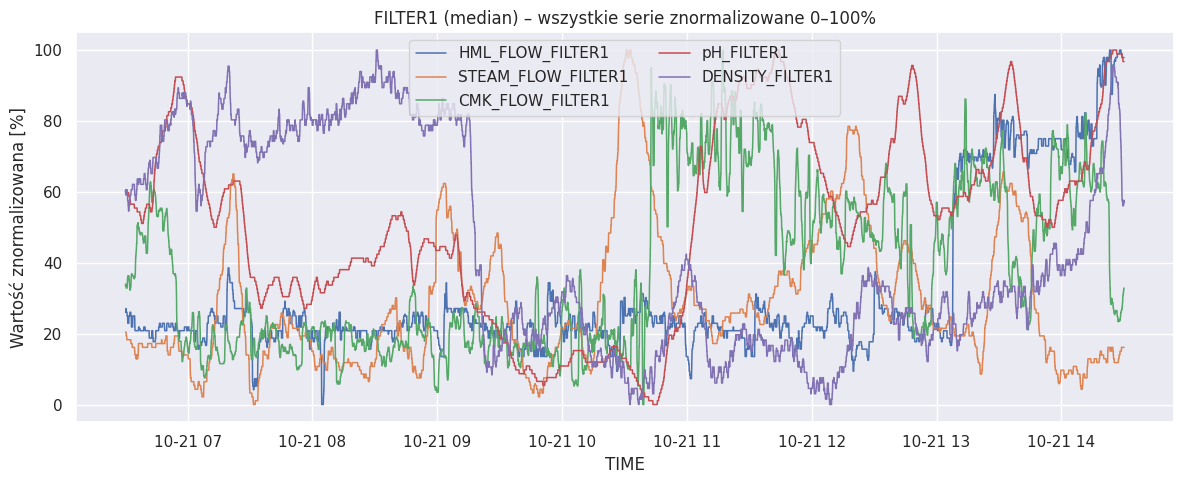

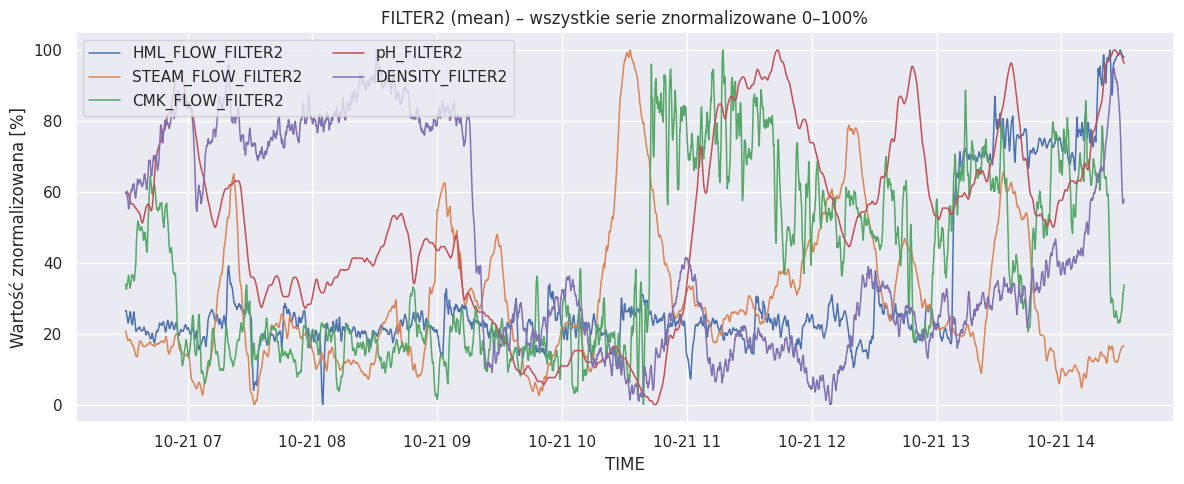

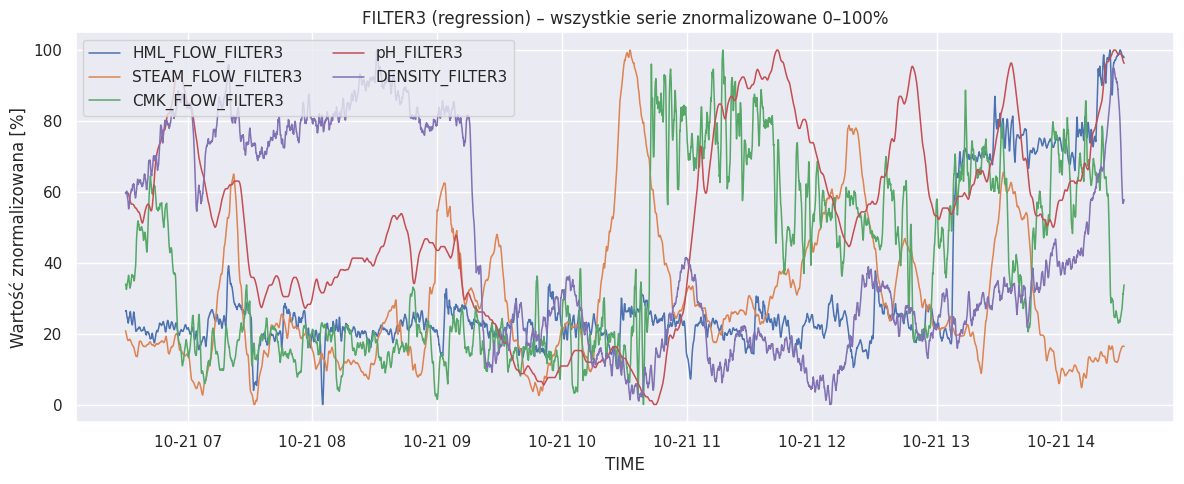

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Funkcja do normalizacji w zakresie 0–100 ---
def normalize(series):
    s_min, s_max = series.min(), series.max()
    if s_max - s_min == 0:
        return series * 0  # zabezpieczenie przed dzieleniem przez zero
    return 100 * (series - s_min) / (s_max - s_min)

# --- Wspólna funkcja wykresu z normalizacją ---
def plot_multi_normalized(df, xcol, ycols, title):
    plt.figure(figsize=(12,5))
    for col in ycols:
        if col in df.columns:
            norm = normalize(df[col])
            plt.plot(df[xcol], norm, linewidth=1.1, label=col)
    plt.title(title)
    plt.xlabel(xcol)
    plt.ylabel('Wartość znormalizowana [%]')
    plt.grid(True)
    plt.legend(ncol=2)
    plt.tight_layout()
    plt.show()

# --- 1) Surowe dane ---
raw_cols = ['HML_FLOW', 'STEAM_FLOW', 'CMK_FLOW', 'pH', 'DENSITY']
plot_multi_normalized(df, 'TIME', raw_cols,
                      'RAW (znormalizowane 0–100%): HML_FLOW, STEAM_FLOW, CMK_FLOW, pH, DENSITY')

# --- 2) Filtr medianowy (FILTER1) ---
f1_cols = ['HML_FLOW_FILTER1', 'STEAM_FLOW_FILTER1', 'CMK_FLOW_FILTER1', 'pH_FILTER1', 'DENSITY_FILTER1']
plot_multi_normalized(df, 'TIME', f1_cols,
                      'FILTER1 (median) – wszystkie serie znormalizowane 0–100%')

# --- 3) Filtr uśredniający (FILTER2) ---
f2_cols = ['HML_FLOW_FILTER2', 'STEAM_FLOW_FILTER2', 'CMK_FLOW_FILTER2', 'pH_FILTER2', 'DENSITY_FILTER2']
plot_multi_normalized(df, 'TIME', f2_cols,
                      'FILTER2 (mean) – wszystkie serie znormalizowane 0–100%')

# --- 4) Filtr regresyjny (FILTER3) ---
f3_cols = ['HML_FLOW_FILTER3', 'STEAM_FLOW_FILTER3', 'CMK_FLOW_FILTER3', 'pH_FILTER3', 'DENSITY_FILTER3']
plot_multi_normalized(df, 'TIME', f3_cols,
                      'FILTER3 (regression) – wszystkie serie znormalizowane 0–100%')


wykresy - pH, density, Calkmilk

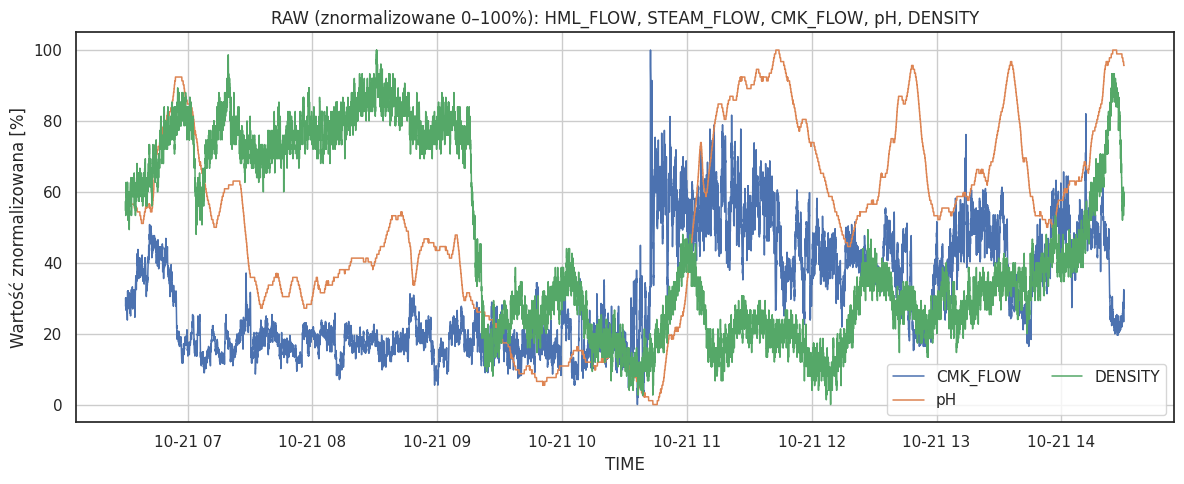

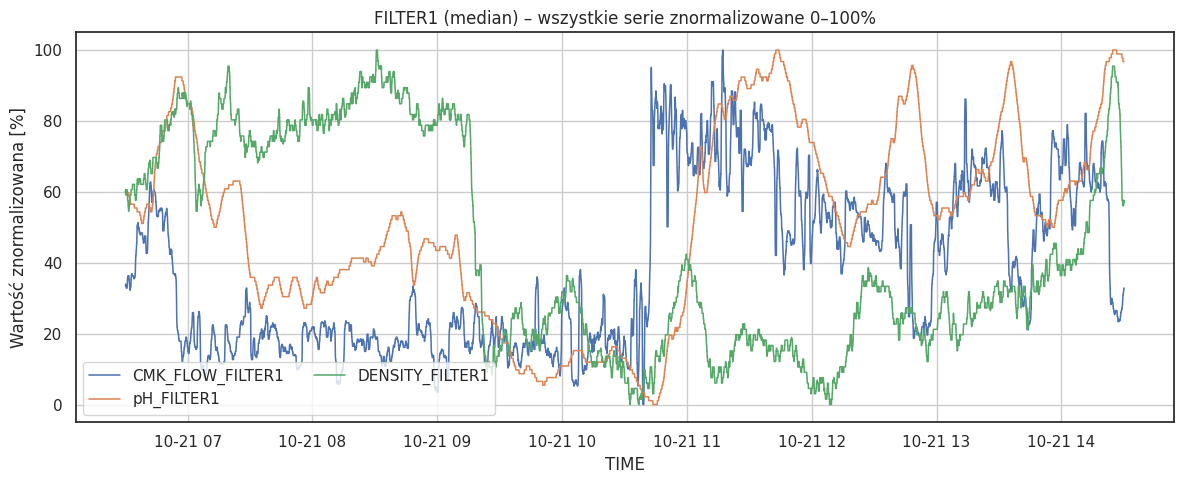

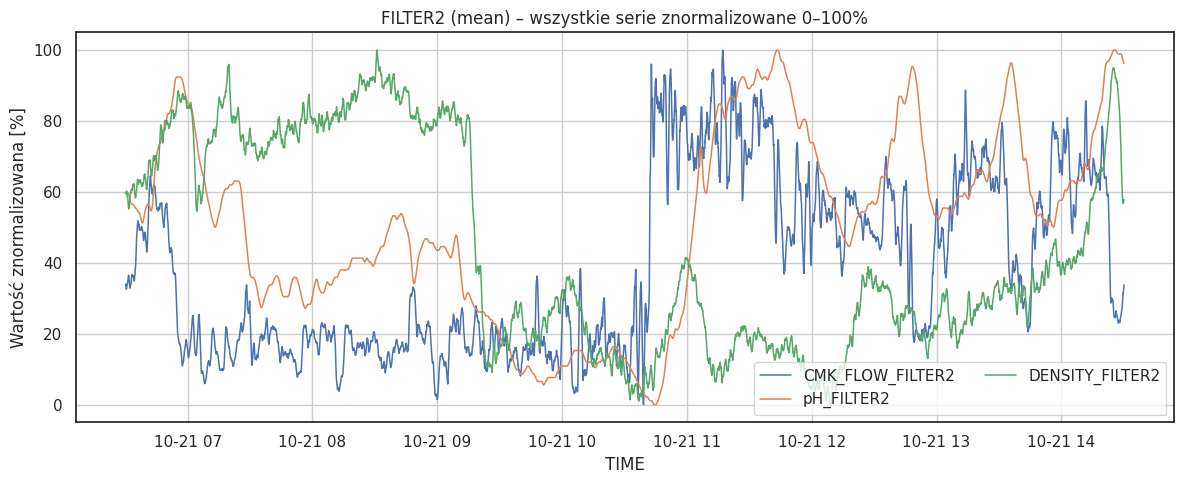

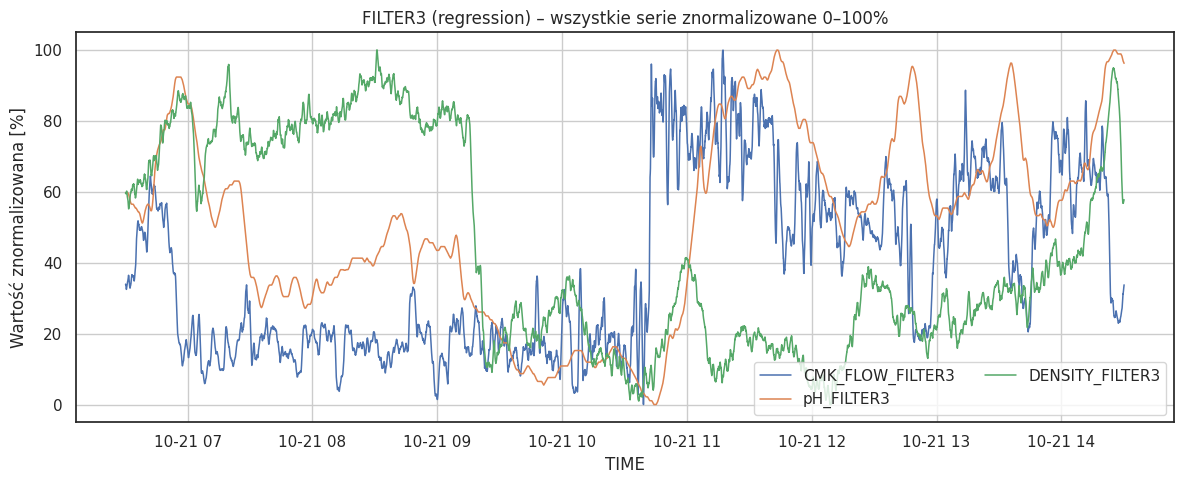

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Funkcja do normalizacji w zakresie 0–100 ---
def normalize(series):
    s_min, s_max = series.min(), series.max()
    if s_max - s_min == 0:
        return series * 0  # zabezpieczenie przed dzieleniem przez zero
    return 100 * (series - s_min) / (s_max - s_min)

# --- Wspólna funkcja wykresu z normalizacją ---
def plot_multi_normalized(df, xcol, ycols, title):
    plt.figure(figsize=(12,5))
    for col in ycols:
        if col in df.columns:
            norm = normalize(df[col])
            plt.plot(df[xcol], norm, linewidth=1.1, label=col)
    plt.title(title)
    plt.xlabel(xcol)
    plt.ylabel('Wartość znormalizowana [%]')
    plt.grid(True)
    plt.legend(ncol=2)
    plt.tight_layout()
    plt.show()

# --- 1) Surowe dane ---
raw_cols = ['CMK_FLOW', 'pH', 'DENSITY']
plot_multi_normalized(df, 'TIME', raw_cols,
                      'RAW (znormalizowane 0–100%): HML_FLOW, STEAM_FLOW, CMK_FLOW, pH, DENSITY')

# --- 2) Filtr medianowy (FILTER1) ---
f1_cols = ['CMK_FLOW_FILTER1', 'pH_FILTER1', 'DENSITY_FILTER1']
plot_multi_normalized(df, 'TIME', f1_cols,
                      'FILTER1 (median) – wszystkie serie znormalizowane 0–100%')

# --- 3) Filtr uśredniający (FILTER2) ---
f2_cols = ['CMK_FLOW_FILTER2', 'pH_FILTER2', 'DENSITY_FILTER2']
plot_multi_normalized(df, 'TIME', f2_cols,
                      'FILTER2 (mean) – wszystkie serie znormalizowane 0–100%')

# --- 4) Filtr regresyjny (FILTER3) ---
f3_cols = ['CMK_FLOW_FILTER3', 'pH_FILTER3', 'DENSITY_FILTER3']
plot_multi_normalized(df, 'TIME', f3_cols,
                      'FILTER3 (regression) – wszystkie serie znormalizowane 0–100%')

Funkcja korelacji - Mleko przepływ / pH (dla surowych i filtr3)


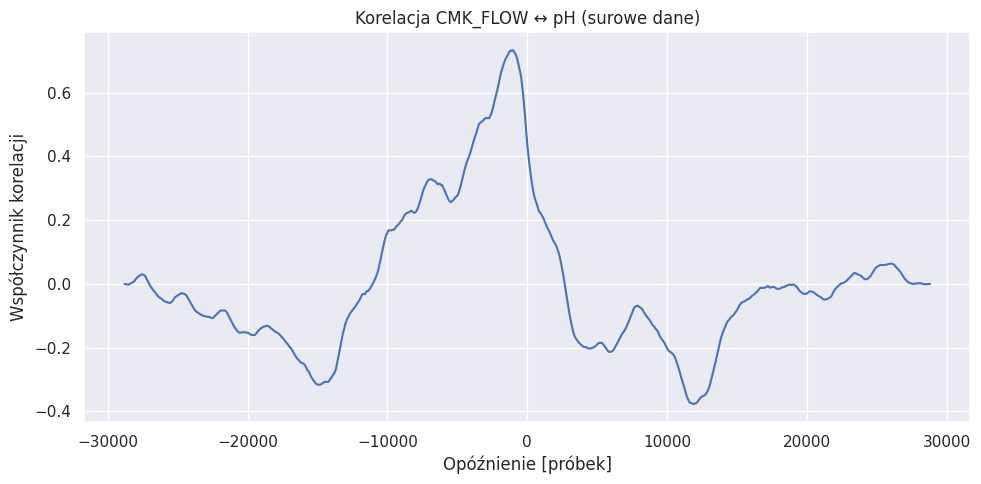

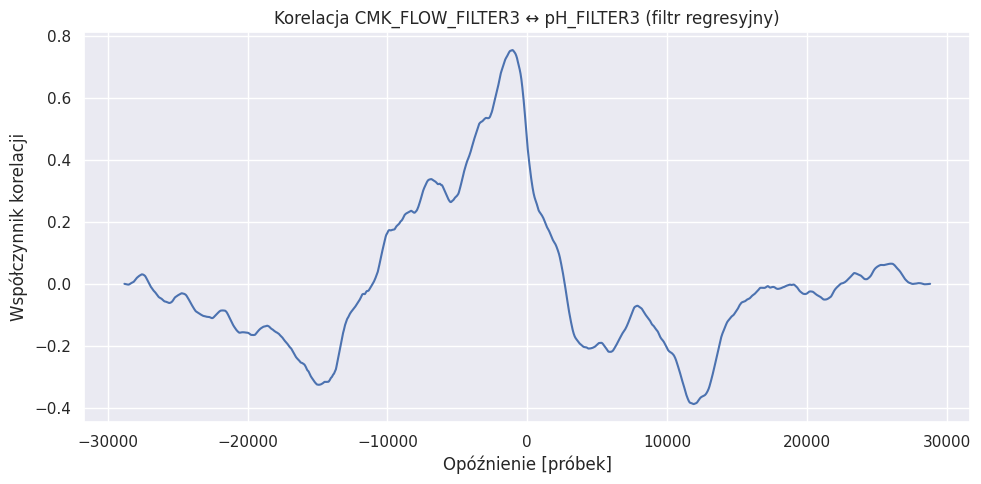

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Przygotowanie danych ---
df['TIME'] = pd.to_datetime(df['TIME'], errors='coerce')
df = df.sort_values('TIME')

# Upewniamy się, że nie ma NaN (dla korelacji to ważne)
series_raw1 = df['CMK_FLOW'].dropna().values
series_raw2 = df['pH'].dropna().values

series_filt1 = df['CMK_FLOW_FILTER3'].dropna().values
series_filt2 = df['pH_FILTER3'].dropna().values

# --- Funkcja do obliczania i rysowania korelacji wzajemnej ---
def plot_crosscorr(x, y, title):
    corr = np.correlate(x - np.mean(x), y - np.mean(y), mode='full')
    corr = corr / (np.std(x) * np.std(y) * len(x))
    lags = np.arange(-len(x) + 1, len(x))
    plt.figure(figsize=(10,5))
    plt.plot(lags, corr)
    plt.title(title)
    plt.xlabel('Opóźnienie [próbek]')
    plt.ylabel('Współczynnik korelacji')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- 1) Korelacja dla sygnałów surowych ---
plot_crosscorr(series_raw1, series_raw2,
               'Korelacja CMK_FLOW ↔ pH (surowe dane)')

# --- 2) Korelacja dla sygnałów po filtrze regresyjnym (FILTER3) ---
plot_crosscorr(series_filt1, series_filt2,
               'Korelacja CMK_FLOW_FILTER3 ↔ pH_FILTER3 (filtr regresyjny)')


korelacja CMK pH

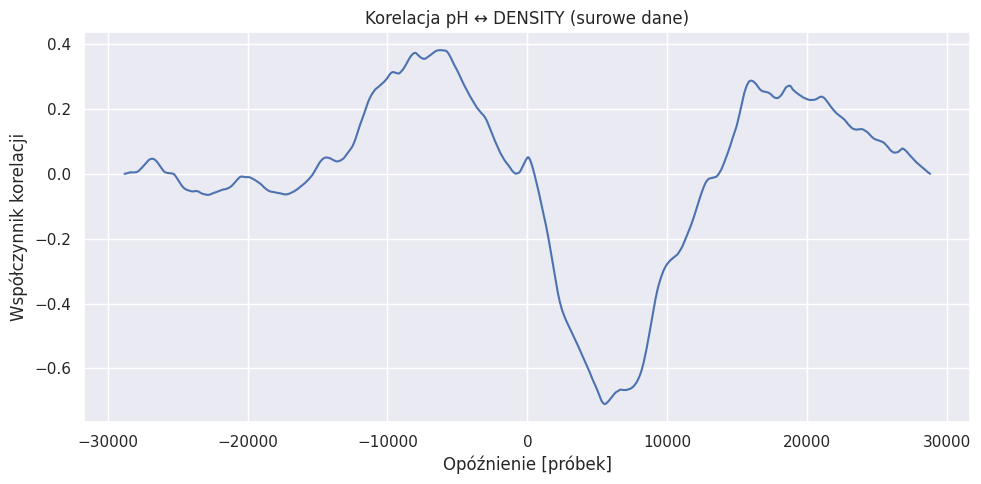

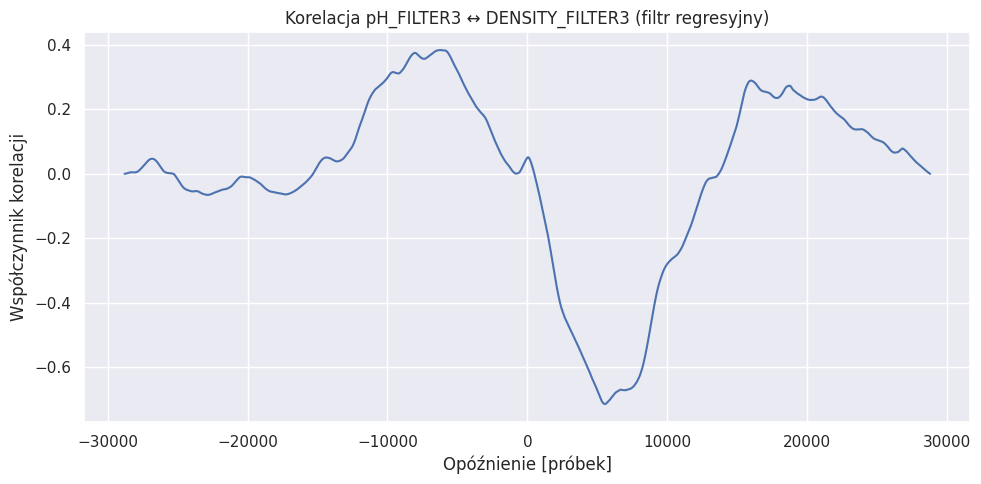

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Funkcja pomocnicza do korelacji ---
def plot_crosscorr(x, y, title):
    corr = np.correlate(x - np.mean(x), y - np.mean(y), mode='full')
    corr = corr / (np.std(x) * np.std(y) * len(x))
    lags = np.arange(-len(x) + 1, len(x))
    plt.figure(figsize=(10,5))
    plt.plot(lags, corr)
    plt.title(title)
    plt.xlabel('Opóźnienie [próbek]')
    plt.ylabel('Współczynnik korelacji')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Dane surowe ---
series_raw_pH = df['pH'].dropna().values
series_raw_DEN = df['DENSITY'].dropna().values

# --- Dane po filtrze regresyjnym ---
series_filt_pH = df['pH_FILTER3'].dropna().values
series_filt_DEN = df['DENSITY_FILTER3'].dropna().values

# --- 1) Korelacja surowych danych ---
plot_crosscorr(series_raw_pH, series_raw_DEN,
               'Korelacja pH ↔ DENSITY (surowe dane)')

# --- 2) Korelacja po filtrze regresyjnym (FILTER3) ---
plot_crosscorr(series_filt_pH, series_filt_DEN,
               'Korelacja pH_FILTER3 ↔ DENSITY_FILTER3 (filtr regresyjny)')


Heat Map - stayczna

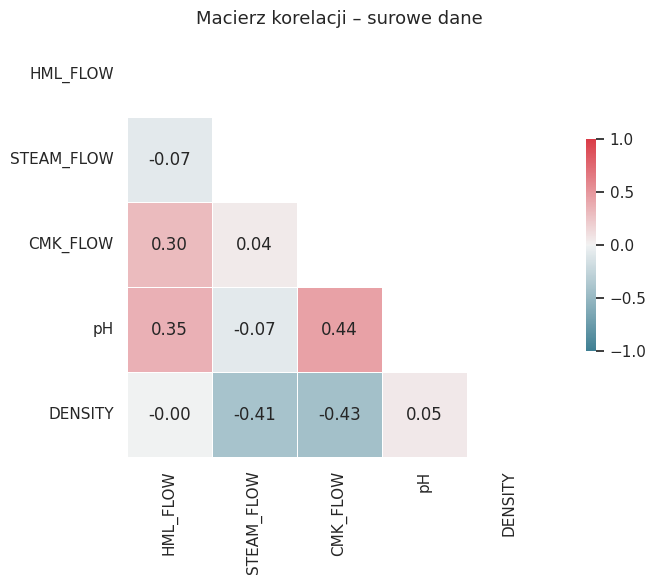

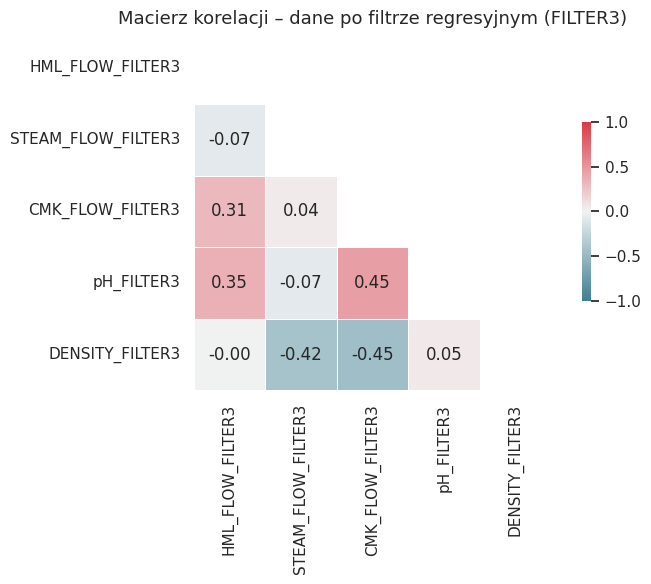

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# --- 1) Korelacja surowych danych ---
raw_cols = ['HML_FLOW', 'STEAM_FLOW', 'CMK_FLOW', 'pH', 'DENSITY']
corr_raw = df[raw_cols].corr()

sns.set(style="white")
mask = np.triu(np.ones_like(corr_raw, dtype=bool))  # maska górnego trójkąta
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_raw, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, annot=True, fmt=".2f",
            cbar_kws={"shrink": .5})
plt.title('Macierz korelacji – surowe dane', fontsize=13)
plt.tight_layout()
plt.show()

# --- 2) Korelacja po filtrze regresyjnym (FILTER3) ---
filt_cols = ['HML_FLOW_FILTER3', 'STEAM_FLOW_FILTER3', 'CMK_FLOW_FILTER3', 'pH_FILTER3', 'DENSITY_FILTER3']
corr_filt = df[filt_cols].corr()

mask = np.triu(np.ones_like(corr_filt, dtype=bool))
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_filt, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, annot=True, fmt=".2f",
            cbar_kws={"shrink": .5})
plt.title('Macierz korelacji – dane po filtrze regresyjnym (FILTER3)', fontsize=13)
plt.tight_layout()
plt.show()


korelacja dynamiczna

In [ ]:
import numpy as np
import pandas as pd
from itertools import combinations

# --- 0) Ustal krok czasowy dt [s] z kolumny TIME (jeśli możliwe) ---
#    Jeśli nie wyjdzie, przyjmujemy 1 s.
try:
    dt_seconds = pd.Series(np.diff(df['TIME'].dropna().values)
                           .astype('timedelta64[ns]').astype('int64')/1e9).median()
    if not np.isfinite(dt_seconds) or dt_seconds <= 0:
        dt_seconds = 1.0
except Exception:
    dt_seconds = 1.0

# --- 1) Funkcje pomocnicze ---
def crosscorr_lags(x, y):
    """
    Zwraca (lags, corr), gdzie:
      - lags: wektor opóźnień od -(n-1) do (n-1)
      - corr: znormalizowana funkcja korelacji wzajemnej ([-1, 1])
    Uwaga: dane są automatycznie maskowane do wspólnych, nie-NaN próbek.
    """
    mask = np.isfinite(x) & np.isfinite(y)
    x = np.asarray(x[mask], dtype=float)
    y = np.asarray(y[mask], dtype=float)
    n = len(x)
    if n < 2 or np.std(x) == 0 or np.std(y) == 0:
        return np.array([0]), np.array([np.nan])

    xz = x - x.mean()
    yz = y - y.mean()
    corr_full = np.correlate(xz, yz, mode='full') / (np.std(x) * np.std(y) * n)
    lags = np.arange(-n+1, n)
    return lags, corr_full

def best_lag_and_corr(x, y, max_lag=None):
    """
    Zwraca (lag_best, corr_best) dla |corr| maksymalnej.
    Jeśli max_lag podane, zawęża przeszukiwanie do |lag| <= max_lag.
    """
    lags, corr = crosscorr_lags(x, y)
    if corr.size == 1 and not np.isfinite(corr[0]):
        return 0, np.nan
    if max_lag is not None:
        sel = np.abs(lags) <= int(max_lag)
        lags = lags[sel]
        corr = corr[sel]
    idx = np.nanargmax(np.abs(corr))
    return int(lags[idx]), float(corr[idx])

def pairs_results(df, cols, label, max_lag=None):
    """
    Dla wszystkich par z listy 'cols' zwraca DataFrame z:
      col_x, col_y, lag_samples, lag_seconds, corr, abs_corr, dataset_label
    """
    rows = []
    for a, b in combinations(cols, 2):
        lag, r = best_lag_and_corr(df[a].values, df[b].values, max_lag=max_lag)
        rows.append({
            "col_x": a,
            "col_y": b,
            "lag_samples": lag,
            "lag_seconds": lag * dt_seconds,
            "corr": r,
            "|corr|": abs(r),
            "set": label
        })
    out = pd.DataFrame(rows).sort_values("|corr|", ascending=False).reset_index(drop=True)
    return out

# --- 2) Parametr maksymalnego przeszukiwanego opóźnienia (opcjonalnie) ---
#    Ustaw np. na 30000 próbek lub na 1/2 długości sygnału – cokolwiek mniejsze.
N_common = len(df)
MAX_LAG = int(min(30000, max(10, N_common//2)))   # możesz zmienić wg potrzeb

# --- 3) Obliczenia dla RAW i FILTER3 ---
raw_cols  = ['HML_FLOW', 'STEAM_FLOW', 'CMK_FLOW', 'pH', 'DENSITY']
f3_cols   = ['HML_FLOW_FILTER3', 'STEAM_FLOW_FILTER3', 'CMK_FLOW_FILTER3', 'pH_FILTER3', 'DENSITY_FILTER3']

results_raw = pairs_results(df, raw_cols,  label="RAW",      max_lag=MAX_LAG)
results_f3  = pairs_results(df, f3_cols,   label="FILTER3",  max_lag=MAX_LAG)

# --- 4) Wyświetlenie podsumowania ---
print(f"\nSzacowany krok czasowy dt ≈ {dt_seconds:.3f} s")
print("\n=== Najsilniejsze zależności (RAW) – posortowane wg |corr| ===")
print(results_raw[['col_x','col_y','lag_samples','lag_seconds','corr','|corr|']])

print("\n=== Najsilniejsze zależności (FILTER3) – posortowane wg |corr| ===")
print(results_f3[['col_x','col_y','lag_samples','lag_seconds','corr','|corr|']])

# Tip: jeśli chcesz tylko jedną parę, np. pH vs DENSITY z dead time:
# r_row = results_raw.query("col_x == 'pH' & col_y == 'DENSITY'").head(1)
# f_row = results_f3.query("col_x == 'pH_FILTER3' & col_y == 'DENSITY_FILTER3'").head(1)



Szacowany krok czasowy dt ≈ 1.000 s

=== Najsilniejsze zależności (RAW) – posortowane wg |corr| ===
        col_x       col_y  lag_samples  lag_seconds      corr    |corr|
0    CMK_FLOW          pH        -1078      -1078.0  0.733914  0.733914
1          pH     DENSITY         5539       5539.0 -0.709860  0.709860
2    CMK_FLOW     DENSITY         4825       4825.0 -0.696600  0.696600
3    HML_FLOW    CMK_FLOW         8772       8772.0  0.624710  0.624710
4    HML_FLOW          pH        13228      13228.0 -0.529699  0.529699
5    HML_FLOW     DENSITY        13568      13568.0 -0.512512  0.512512
6  STEAM_FLOW    CMK_FLOW        -1358      -1358.0  0.434727  0.434727
7  STEAM_FLOW          pH        -3118      -3118.0  0.421894  0.421894
8  STEAM_FLOW     DENSITY         -660       -660.0 -0.419705  0.419705
9    HML_FLOW  STEAM_FLOW         5555       5555.0  0.319201  0.319201

=== Najsilniejsze zależności (FILTER3) – posortowane wg |corr| ===
                col_x               col

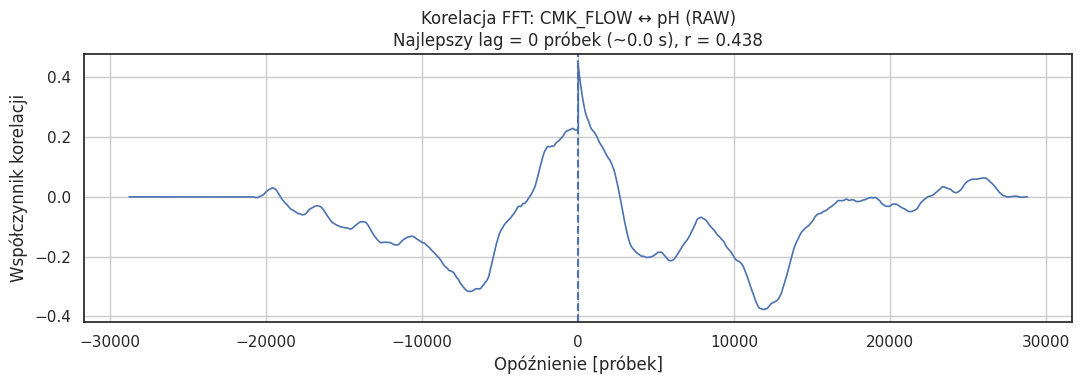

[INFO] Korelacja FFT: CMK_FLOW ↔ pH (RAW): lag_best = 0 próbek (~0.00 s), r = 0.4375


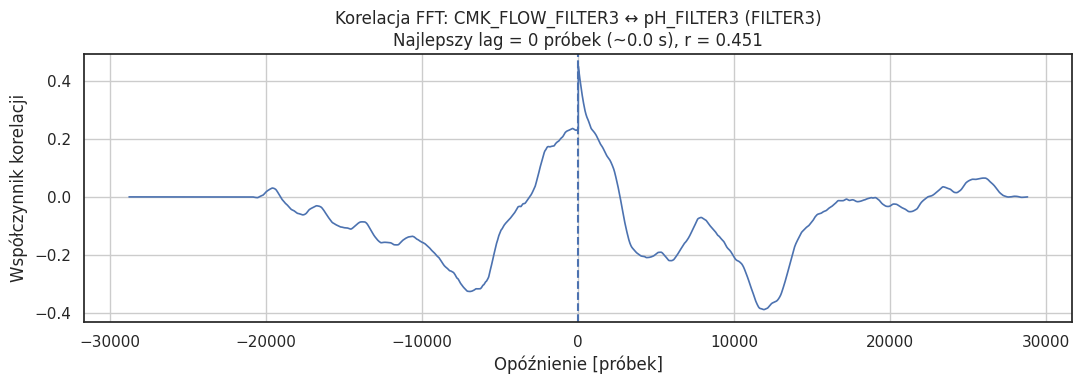

[INFO] Korelacja FFT: CMK_FLOW_FILTER3 ↔ pH_FILTER3 (FILTER3): lag_best = 0 próbek (~0.00 s), r = 0.4512


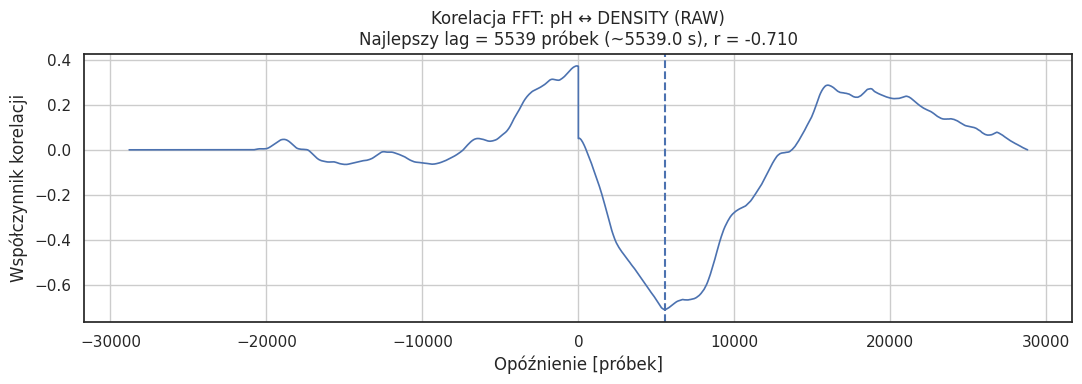

[INFO] Korelacja FFT: pH ↔ DENSITY (RAW): lag_best = 5539 próbek (~5539.00 s), r = -0.7099


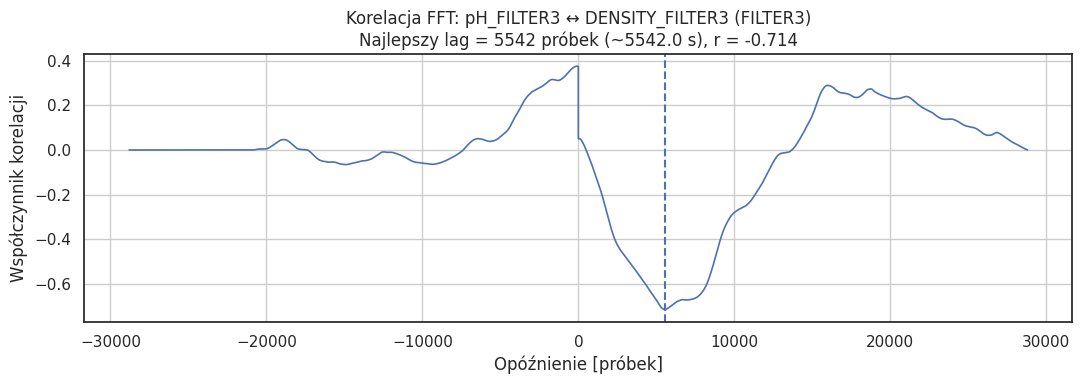

[INFO] Korelacja FFT: pH_FILTER3 ↔ DENSITY_FILTER3 (FILTER3): lag_best = 5542 próbek (~5542.00 s), r = -0.7142


(5542, -0.7142193684730778)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 0) Krok czasowy (sekundy) z kolumny TIME – przyda się do dead time
try:
    dt = pd.Series(np.diff(df['TIME'].values)
                   .astype('timedelta64[ns]').astype('int64')/1e9).median()
    if not np.isfinite(dt) or dt <= 0: dt = 1.0
except Exception:
    dt = 1.0

# 1) Pomocniczo: ujednolicenie długości i masek NaN (bierzemy wspólne nie-NaN)
def _align_finite(a, b):
    a = np.asarray(a, dtype=float)
    b = np.asarray(b, dtype=float)
    m = np.isfinite(a) & np.isfinite(b)
    a = a[m]; b = b[m]
    return a, b

# 2) FFT cross-correlation (full) z normalizacją do [-1, 1]
def fft_crosscorr(x, y):
    """
    Zwraca lags (próbki) i znormalizowaną korelację krzyżową r_xy[k] w trybie 'full'.
    r_xy[k] = ifft( FFT(xz) * conj(FFT(yz)) ), gdzie xz,yz są odjęte o średnią.
    Normalizacja przez (std(x)*std(y)*n).
    """
    x, y = _align_finite(x, y)
    n = len(x)
    if n < 2 or np.std(x) == 0 or np.std(y) == 0:
        return np.array([0]), np.array([np.nan])

    # Odjęcie średniej (ważne dla korelacji)
    xz = x - x.mean()
    yz = y - y.mean()

    # Zero-padding do najmniejszej potęgi 2 >= 2n-1 (szybko w FFT)
    n_full = 2*n - 1
    n_fft = 1 << (n_full - 1).bit_length()

    # FFT i iloczyn z sprzężeniem
    X = np.fft.rfft(xz, n=n_fft)
    Y = np.fft.rfft(yz, n=n_fft)
    R = X * np.conj(Y)

    # IFFT -> korelacja (realna)
    r_full = np.fft.irfft(R, n=n_fft)[:n_full]

    # Przesunięcie tak, by zero-lag był na środku (konwencja 'full')
    # r_xy[k] dla k = -(n-1) ... (n-1)
    r_full = np.concatenate([r_full[-(n-1):], r_full[:n]])

    # Normalizacja
    r_full = r_full / (np.std(x) * np.std(y) * n)

    lags = np.arange(-n+1, n)
    return lags, r_full

# 3) Znalezienie najlepszego laga (dead time) – maks. |r|
def best_lag_fft(x, y, max_lag=None):
    lags, r = fft_crosscorr(x, y)
    if max_lag is not None:
        sel = np.abs(lags) <= int(max_lag)
        lags, r = lags[sel], r[sel]
    i = np.nanargmax(np.abs(r))
    return int(lags[i]), float(r[i]), lags, r

# 4) Wygodny wykres z oznaczeniem najlepszego laga
def plot_xcorr_fft(x, y, title, max_lag=None):
    lag, rmax, lags, r = best_lag_fft(x, y, max_lag=max_lag)
    plt.figure(figsize=(11,4))
    plt.plot(lags, r, linewidth=1.2)
    plt.axvline(lag, linestyle='--')
    plt.title(f"{title}\nNajlepszy lag = {lag} próbek (~{lag*dt:.1f} s), r = {rmax:.3f}")
    plt.xlabel('Opóźnienie [próbek]')
    plt.ylabel('Współczynnik korelacji')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    print(f"[INFO] {title}: lag_best = {lag} próbek (~{lag*dt:.2f} s), r = {rmax:.4f}")
    return lag, rmax

# ===== PRZYKŁADY – jak wcześniej analizowaliśmy =====

# (A) CMK_FLOW ↔ pH (surowe)
plot_xcorr_fft(df['CMK_FLOW'].values, df['pH'].values,
               'Korelacja FFT: CMK_FLOW ↔ pH (RAW)',
               max_lag=None)   # np. podaj np. 30000 jeśli chcesz ograniczyć zakres

# (B) CMK_FLOW_FILTER3 ↔ pH_FILTER3 (po filtrze regresyjnym)
plot_xcorr_fft(df['CMK_FLOW_FILTER3'].values, df['pH_FILTER3'].values,
               'Korelacja FFT: CMK_FLOW_FILTER3 ↔ pH_FILTER3 (FILTER3)',
               max_lag=None)

# (C) pH ↔ DENSITY (surowe)
plot_xcorr_fft(df['pH'].values, df['DENSITY'].values,
               'Korelacja FFT: pH ↔ DENSITY (RAW)',
               max_lag=None)

# (D) pH_FILTER3 ↔ DENSITY_FILTER3 (po filtrze regresyjnym)
plot_xcorr_fft(df['pH_FILTER3'].values, df['DENSITY_FILTER3'].values,
               'Korelacja FFT: pH_FILTER3 ↔ DENSITY_FILTER3 (FILTER3)',
               max_lag=None)
